### Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy.coordinates import SkyCoord
from astropy.visualization.wcsaxes import SphericalCircle
import astropy.units as u


from scipy.interpolate import interp1d

from sklearn.neighbors import KernelDensity

import os
import glob

In [2]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=71, Om0=0.27, Tcmb0=2.725)

In [3]:
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rc, rcParams
f = 0.8

fontsize = 35 * f
labelsize = 35 * f

rc("xtick", labelsize=fontsize * f)
rc("ytick", labelsize=fontsize * f)
rcParams["axes.linewidth"] = 5.3 * f
rcParams["xtick.major.width"] = 5.3 * f
rcParams["xtick.minor.width"] = 5.3 * f
rcParams["ytick.major.width"] = 5.3 * f
rcParams["ytick.minor.width"] = 5.3 * f
rcParams["xtick.major.size"] = 12.5 * f
rcParams["xtick.minor.size"] = 6.5 * f
rcParams["ytick.major.size"] = 12.5 * f
rcParams["ytick.minor.size"] = 6.5 * f

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 50 * f,
        }


cm1 = plt.cm.get_cmap('jet')
cm2 = plt.cm.get_cmap('rainbow')
cm3 = plt.cm.get_cmap('gnuplot2')

color_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colors1 = [cm1(value) for value in color_values]
colors2 = [cm2(value) for value in color_values]
colors3 = [cm3(value) for value in color_values]

/tmp/ipykernel_5639/2439828899.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm1 = plt.cm.get_cmap('jet')
/tmp/ipykernel_5639/2439828899.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm2 = plt.cm.get_cmap('rainbow')
/tmp/ipykernel_5639/2439828899.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm3 = plt.cm.get_cmap('gnuplot2')


[ 1.21154796e-05  4.39319909e-04 -2.11420409e-02  1.77834331e-01]


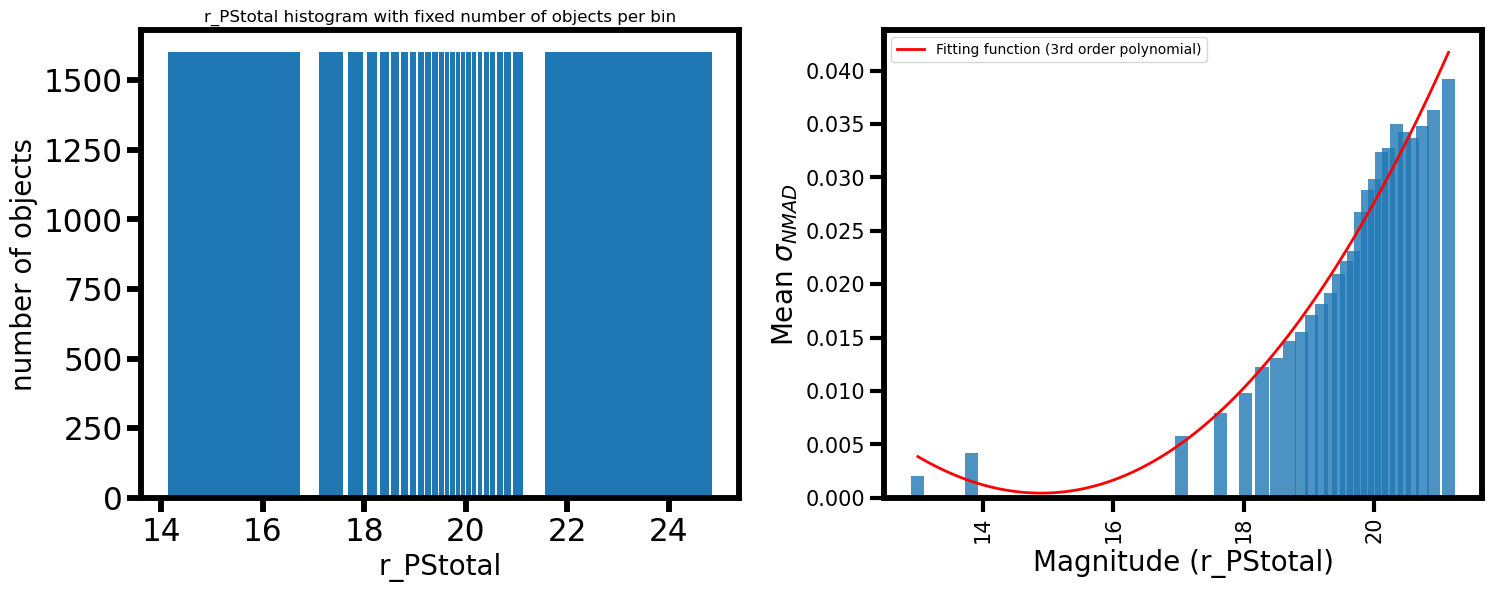

In [4]:
from galaxy_cluster_membership import *

### Define cluster data

In [5]:
cl_names = np.array(['MKW4', 'A639', 'MKW1', '[YMV2007]7604', 'HCG97', 'IC1860',
       'WBL074', 'NGC1132', 'A2870', 'A2877', 'MKW8', '[YMV2007]2116',
       'A4049', 'A4038', 'A3744', 'A3733', 'WBL288', 'A119', 'A957',
       'A168', 'MS0116.3-0115', 'A1631', '[YMV2007]7609', 'A1644',
       'A4059', 'A2717', 'MCXCJ0413.9-3805', '[YMV2007]841',
       'RXJ2137.1+0026', '[YMV2007]4713', 'A993', 'A978', 'MKW6', 'A151',
       'MCXCJ1020.4-0631', '[YMV2007]49', '[YMV2007]514',
       'MCXCJ0346.1-5702', 'A2415', 'A3880', 'A2457', 'A970', 'A974',
       'A3158', 'A3128', 'A3223', 'CODEX-59603', 'A2734', 'A3135',
       'A3809', 'A3122', 'A1069', 'MCXCJ0340-4542', 'A3112',
       'WHLJ012023-000444', 'MCXCJ1326.2+0013', 'A2440', 'A954',
       '[YMV2007]1540'], dtype='<U17')

cl_ra = np.array([180.9905, 160.147 , 150.1337,  36.528 , 356.8456,  42.4038,
        37.8691,  43.2163,  16.9274,  17.5017, 220.1592,  46.3785,
       357.898 , 356.93  , 316.8098, 315.4529, 162.4413,  14.0763,
       153.4179,  18.7405,  19.7234, 193.201 ,  17.0968, 194.2908,
       359.2596,   0.8004,  63.4879,  16.0683, 324.2779, 214.3502,
       155.478 , 155.123 , 214.4027,  17.2088, 155.12  , 214.3315,
        24.3037,  56.54  , 331.4188, 336.9651, 338.9209, 154.3409,
       326.9813,  55.7246,  52.55  ,  62.0592, 359.4333,   2.8363,
        53.5055, 326.7408,  50.568 , 159.935 ,  55.2023,  49.4915,
        20.0964, 201.5733, 335.9708, 153.4367, 154.9313])

cl_dec = np.array([  1.8883, -46.1833,  -2.9573,  -0.3319,  -2.326 , -31.1886,
         1.2707,  -1.2747, -46.908 , -45.9228,   3.4764,  -0.405 ,
       -28.3666, -28.1414, -25.4391, -28.035 ,   0.3517,  -1.2167,
        -0.9144,   0.4376,  -1.0039, -15.4332,   0.0898, -17.4112,
       -34.7606, -35.9272, -38.1   ,  -0.2228,   0.4475,   0.0734,
        -4.95  ,  -6.5168,   2.0619, -15.41  ,  -6.5197,   2.3443,
        -0.5043, -57.05  ,  -5.5933, -30.5628,   1.491 , -10.6787,
       -46.0053, -53.6353, -52.55  , -30.8988,   0.8019, -28.855 ,
       -39.008 , -43.91  , -41.3377,  -8.6836, -45.6839, -44.2468,
        -0.079 ,   0.2251,  -1.6412,  -0.1086,  -0.6436])

cl_z = np.array([0.02  , 0.0204, 0.021 , 0.0211, 0.0218, 0.0223, 0.0225, 0.0231,
       0.0237, 0.0239, 0.027 , 0.0276, 0.0291, 0.0292, 0.0375, 0.0382,
       0.039 , 0.0442, 0.0443, 0.0446, 0.0452, 0.0464, 0.0469, 0.0474,
       0.0493, 0.0495, 0.0501, 0.0507, 0.051 , 0.0529, 0.0533, 0.0536,
       0.0537, 0.0539, 0.054 , 0.0548, 0.0561, 0.057 , 0.0581, 0.0583,
       0.0584, 0.0594, 0.0596, 0.0597, 0.0599, 0.06  , 0.0616, 0.0617,
       0.0618, 0.0625, 0.0644, 0.065 , 0.0689, 0.0736, 0.078 , 0.0826,
       0.0901, 0.0916, 0.0941])

cl_r200_mpc = np.array([1.041, 0.985, 0.251, 0.288, 0.99 , 0.908, 0.836, 0.413, 0.398,
       0.679, 0.992, 1.059, 0.624, 1.529, 0.623, 1.151, 0.574, 1.718,
       1.436, 0.94 , 0.989, 1.323, 0.319, 1.962, 1.523, 1.039, 0.561,
       0.615, 0.687, 0.208, 0.793, 1.061, 1.113, 1.443, 1.061, 0.564,
       0.348, 0.905, 1.384, 0.892, 1.298, 1.55 , 0.995, 2.055, 1.649,
       1.042, 0.434, 1.181, 0.833, 1.117, 1.259, 1.331, 0.732, 0.833,
       0.66 , 0.657, 1.62 , 0.658, 0.615])

In [6]:
cl_radii_kpc = cl_r200_mpc * 1000
cl_r200_deg = []
for zi, i in zip(cl_z, range(len(cl_z))):
    kpc_scale = cosmo.kpc_proper_per_arcmin(z=zi).value/60.
    radius_deg = cl_radii_kpc[i] / (kpc_scale * 3600) #Convert radius from kpc to deg
    cl_r200_deg.append(radius_deg)
    
cl_r200_deg = np.asarray(cl_r200_deg)

In [9]:
#r_auto é a magnitude padrão pra reportar as métricas dos photo-zs segundo o Erik
col_names = ['ra', 'dec', 'zml', 'pdf_weights_0', 'pdf_weights_1', 'pdf_weights_2', 'pdf_means_0',
       'pdf_means_1', 'pdf_means_2', 'pdf_stds_0', 'pdf_stds_1', 'pdf_stds_2', 'r_auto', 'odds', 'z', 'flag_member']

In [10]:
cut_zp = 0.89
cut_R = 0.85

### Run membership

Loading data for cluster A2440
Cluster redshift: 0.0901
Cluster radius: 1.62 Kpc
zp_bias = [0.03150312]


/media/elismar/28909764-00ad-4b97-abc7-faf47aa72d7f/Doc/galaxy-cluster-membership/galaxy_cluster_membership.py:330: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a = 1 / integrate.quad(pdfs_interp, 0.0, 1.0)[0]
/media/elismar/28909764-00ad-4b97-abc7-faf47aa72d7f/Doc/galaxy-cluster-membership/galaxy_cluster_membership.py:337: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be de

Loading data for cluster A954
Cluster redshift: 0.0916
Cluster radius: 0.66 Kpc
zp_bias = [0.03901116]


/media/elismar/28909764-00ad-4b97-abc7-faf47aa72d7f/Doc/galaxy-cluster-membership/galaxy_cluster_membership.py:330: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a = 1 / integrate.quad(pdfs_interp, 0.0, 1.0)[0]
/media/elismar/28909764-00ad-4b97-abc7-faf47aa72d7f/Doc/galaxy-cluster-membership/galaxy_cluster_membership.py:337: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be de

Loading data for cluster [YMV2007]1540
Cluster redshift: 0.0941
Cluster radius: 0.61 Kpc


/tmp/ipykernel_15988/2446019451.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(20, 10))


zp_bias = [0.03771758]


/media/elismar/28909764-00ad-4b97-abc7-faf47aa72d7f/Doc/galaxy-cluster-membership/galaxy_cluster_membership.py:330: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a = 1 / integrate.quad(pdfs_interp, 0.0, 1.0)[0]
/media/elismar/28909764-00ad-4b97-abc7-faf47aa72d7f/Doc/galaxy-cluster-membership/galaxy_cluster_membership.py:337: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be de

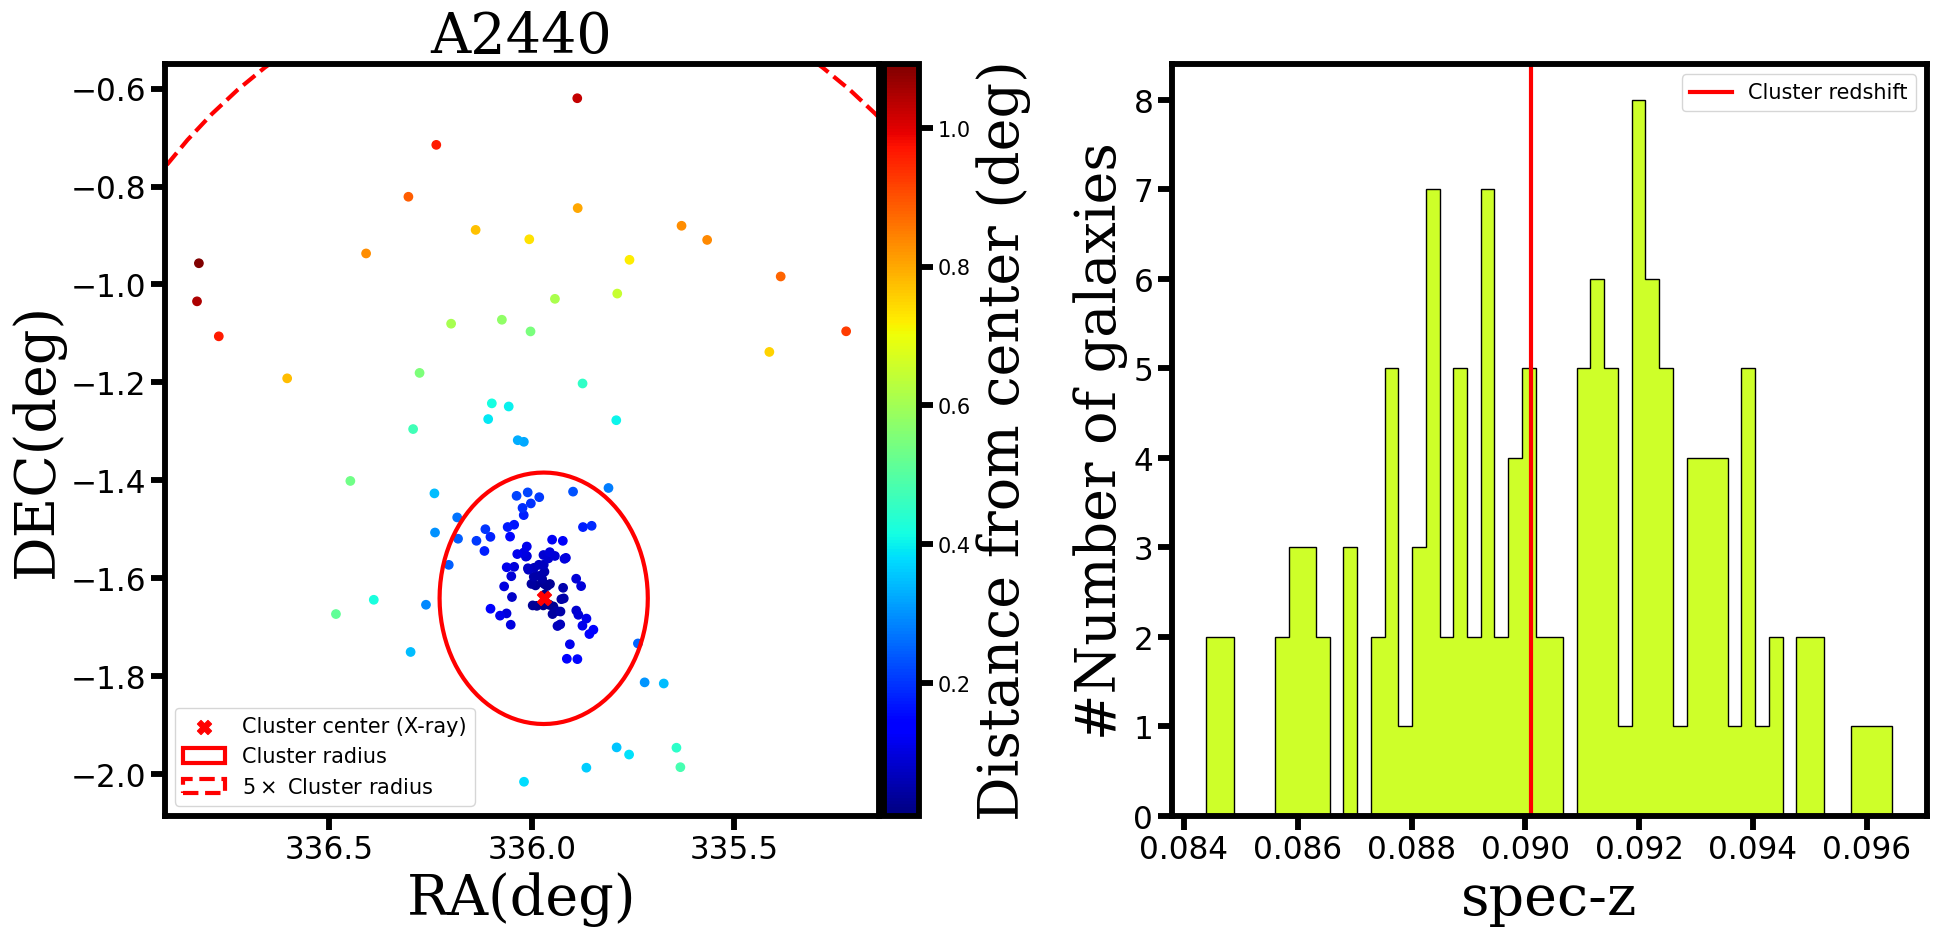

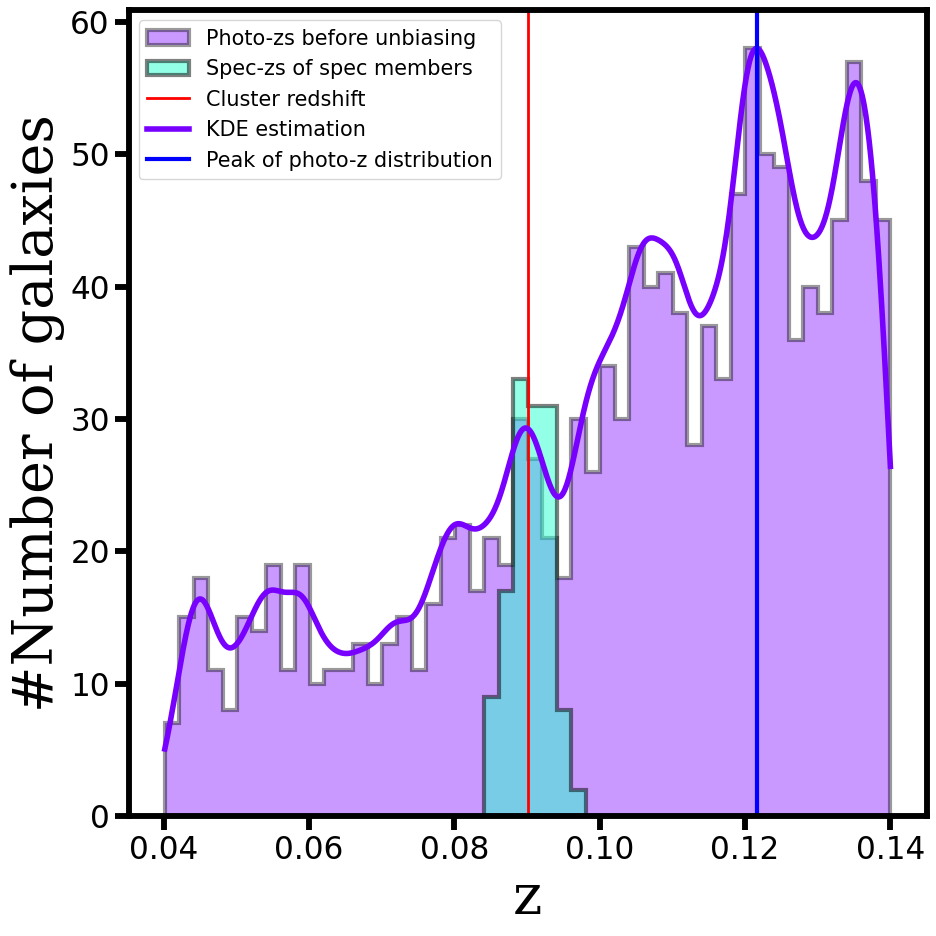

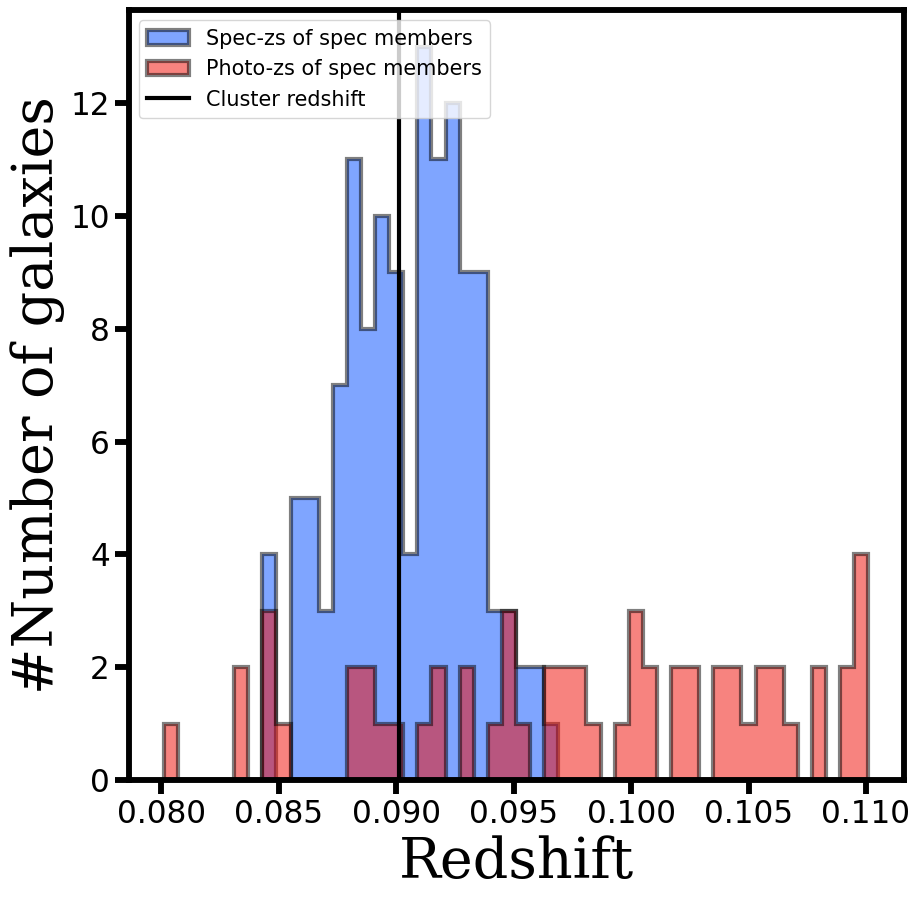

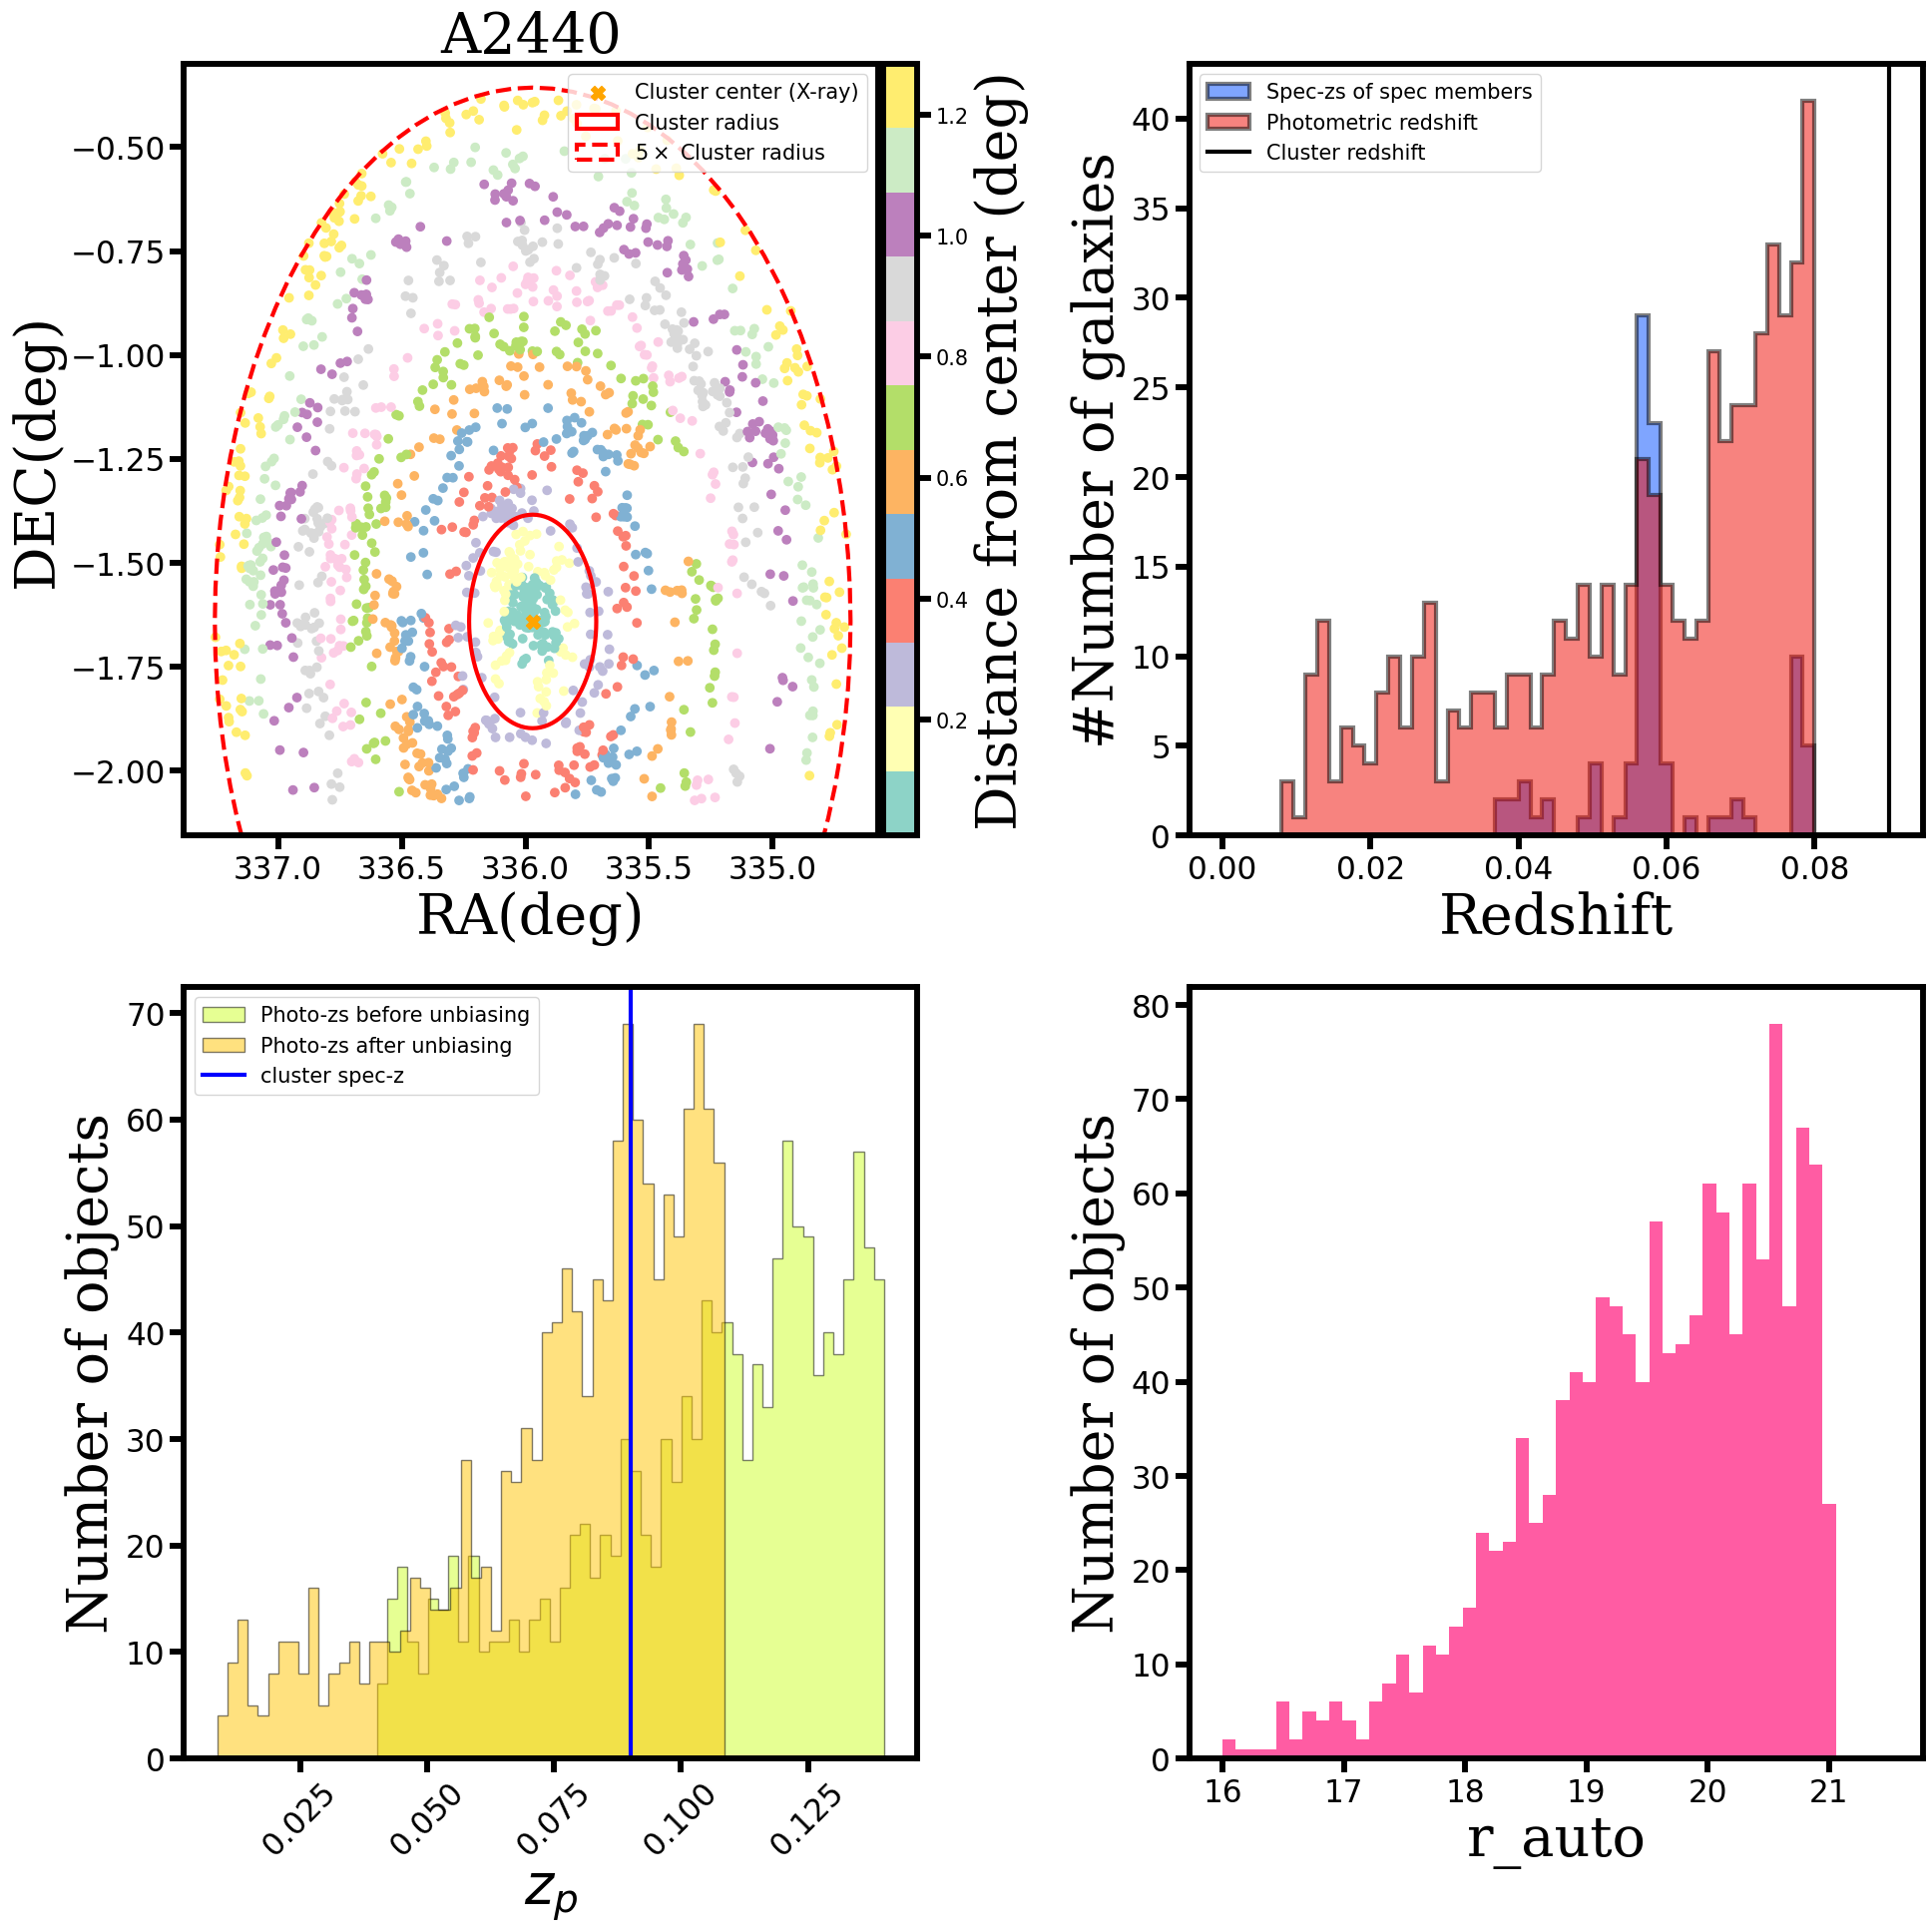

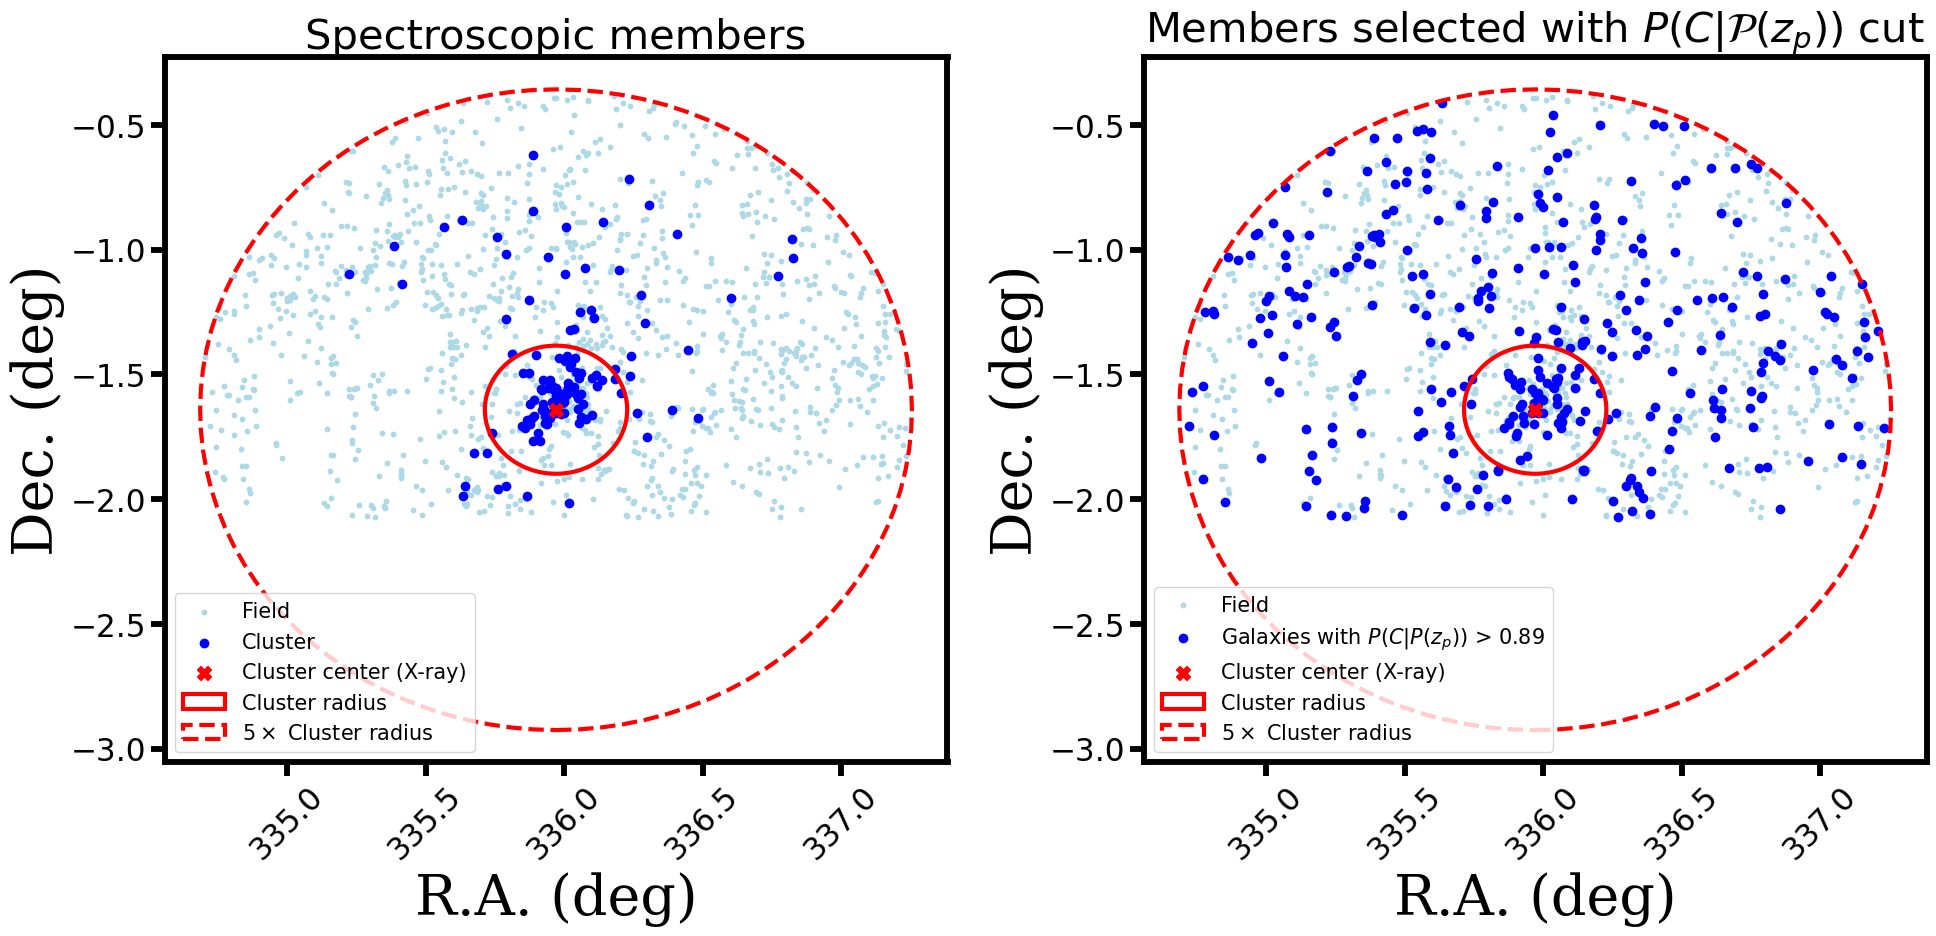

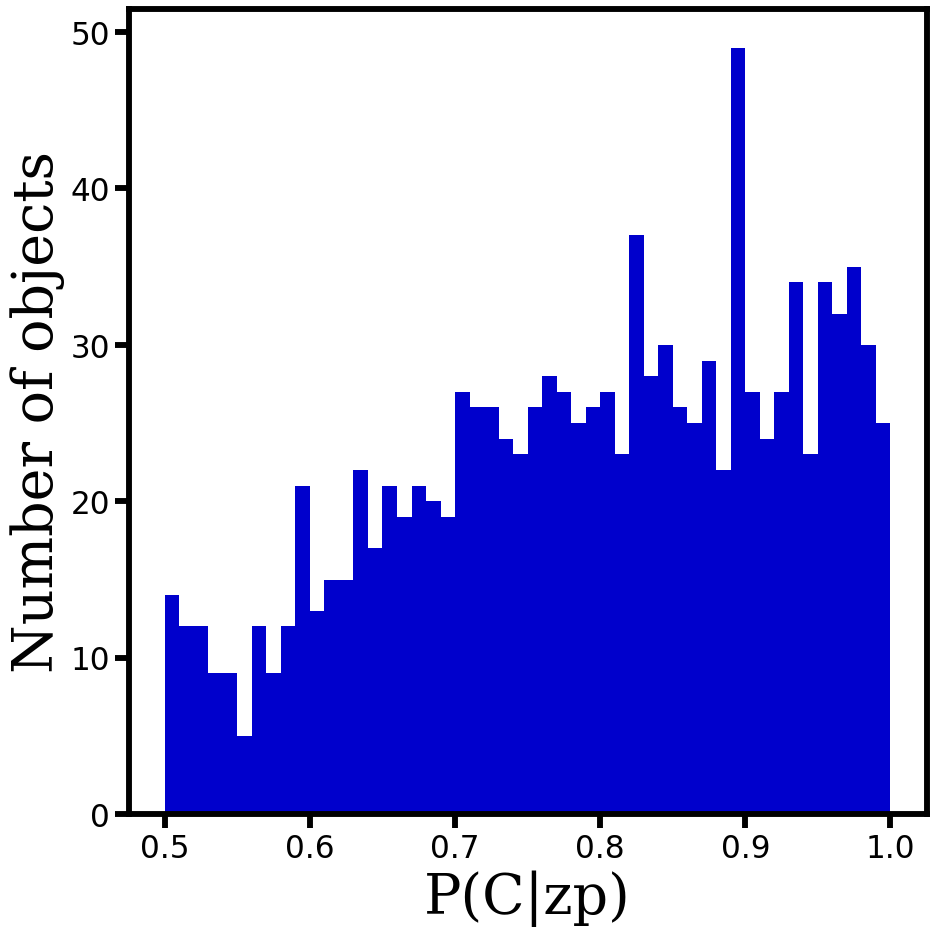

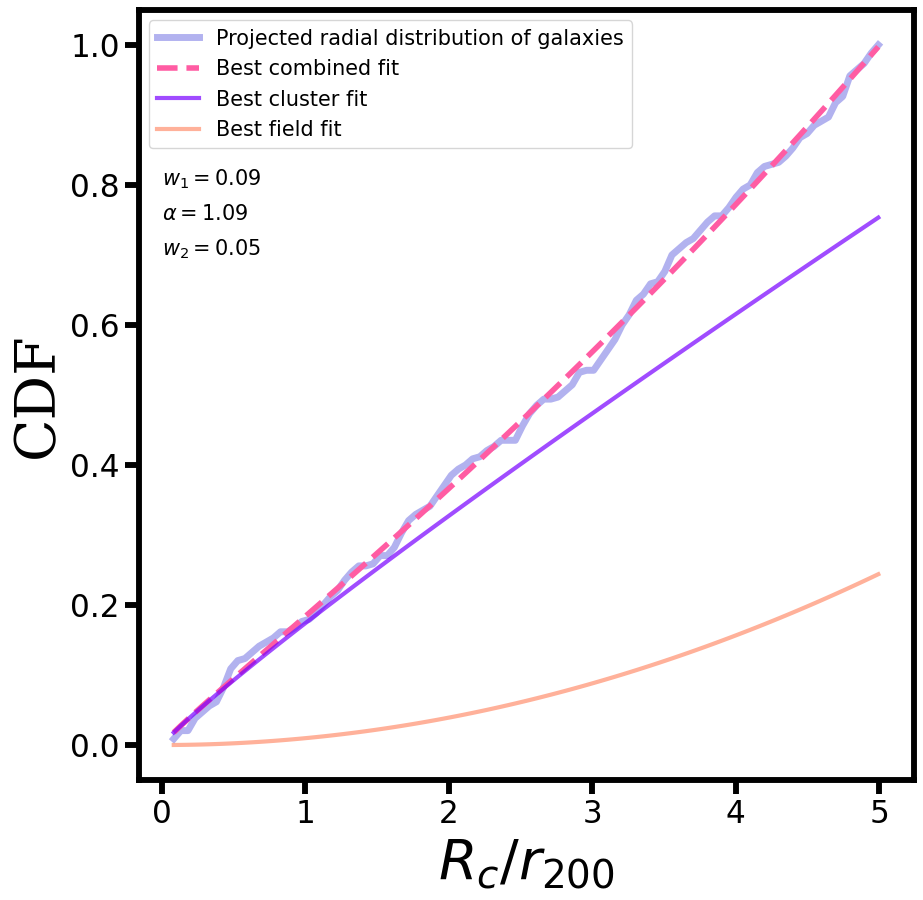

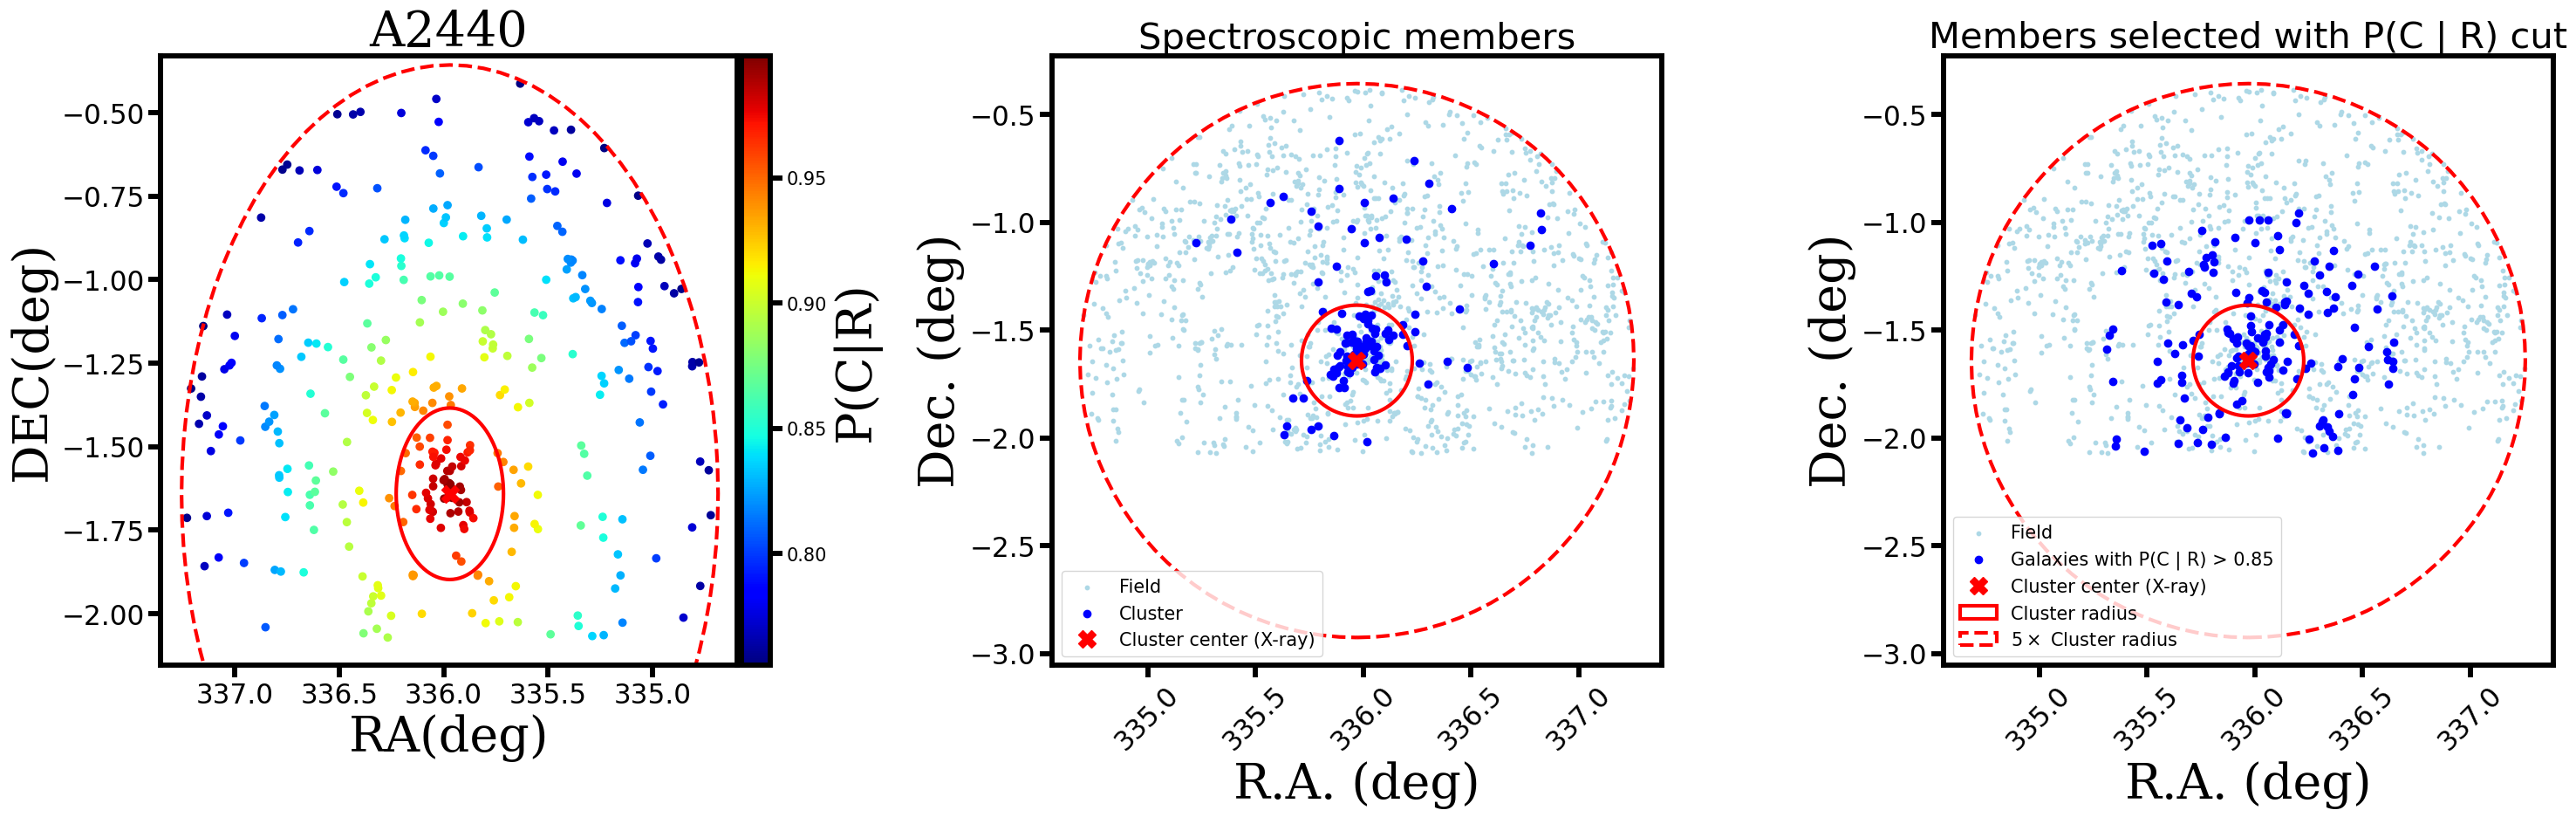

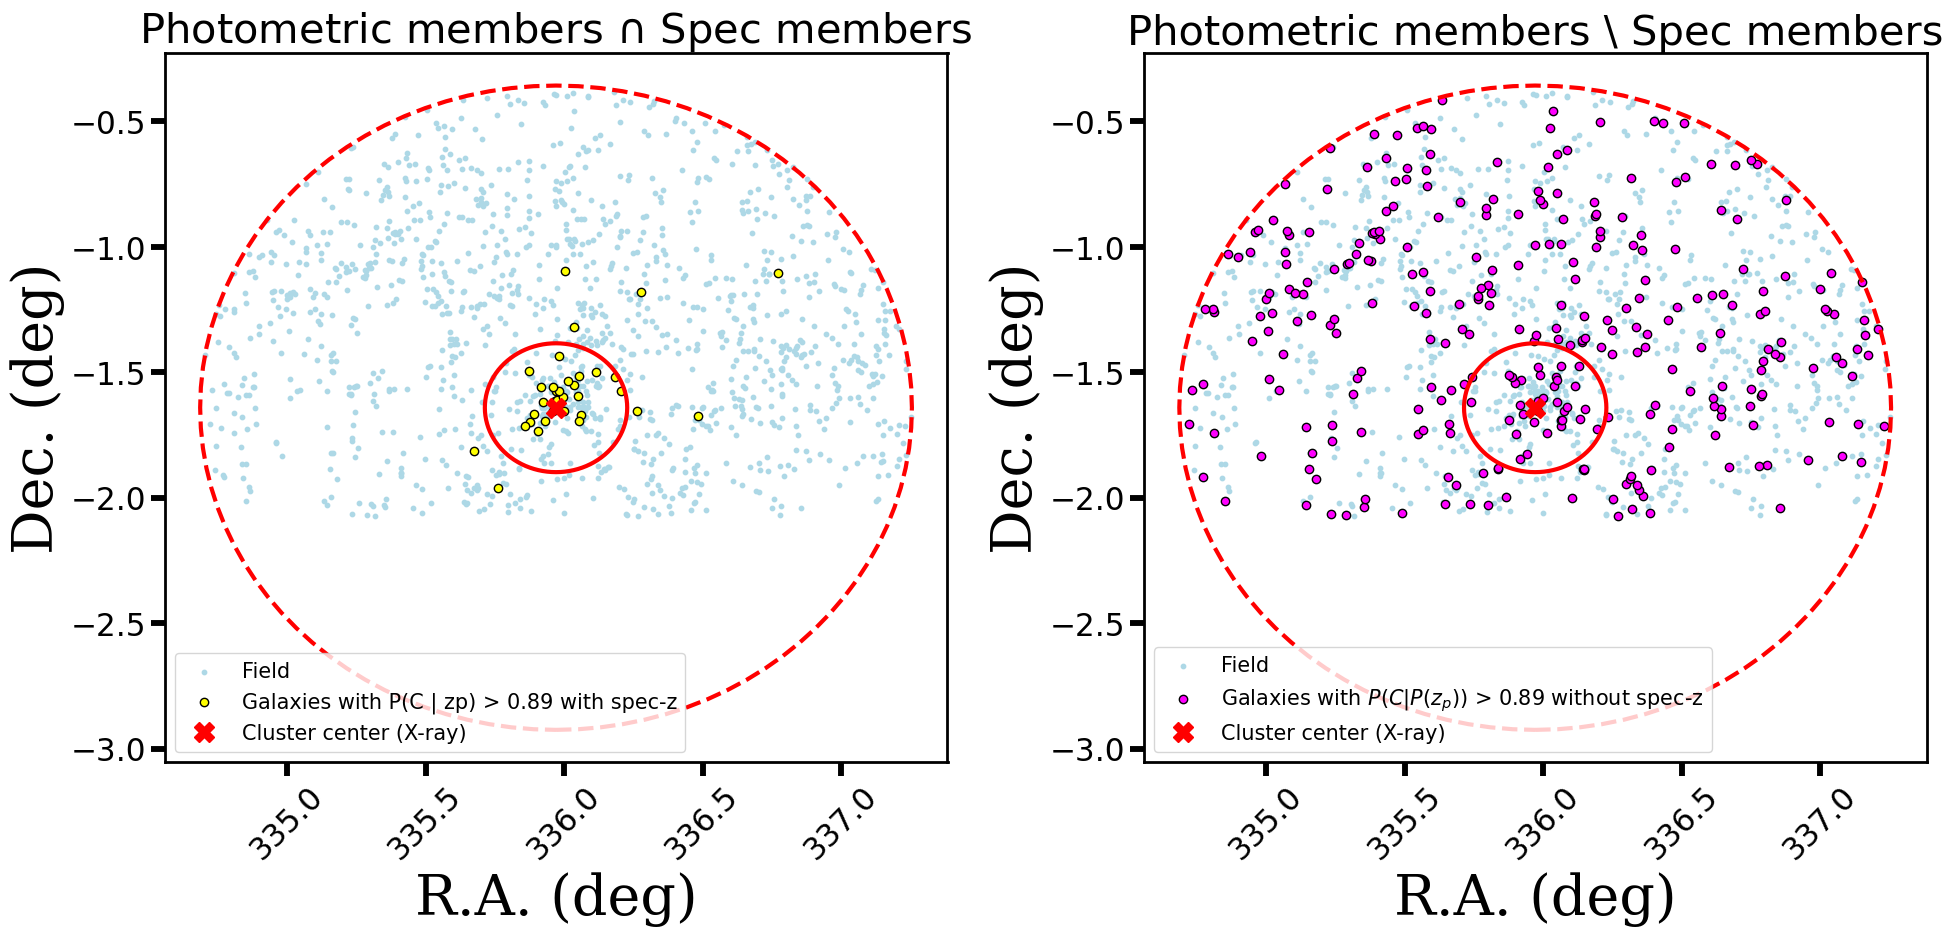

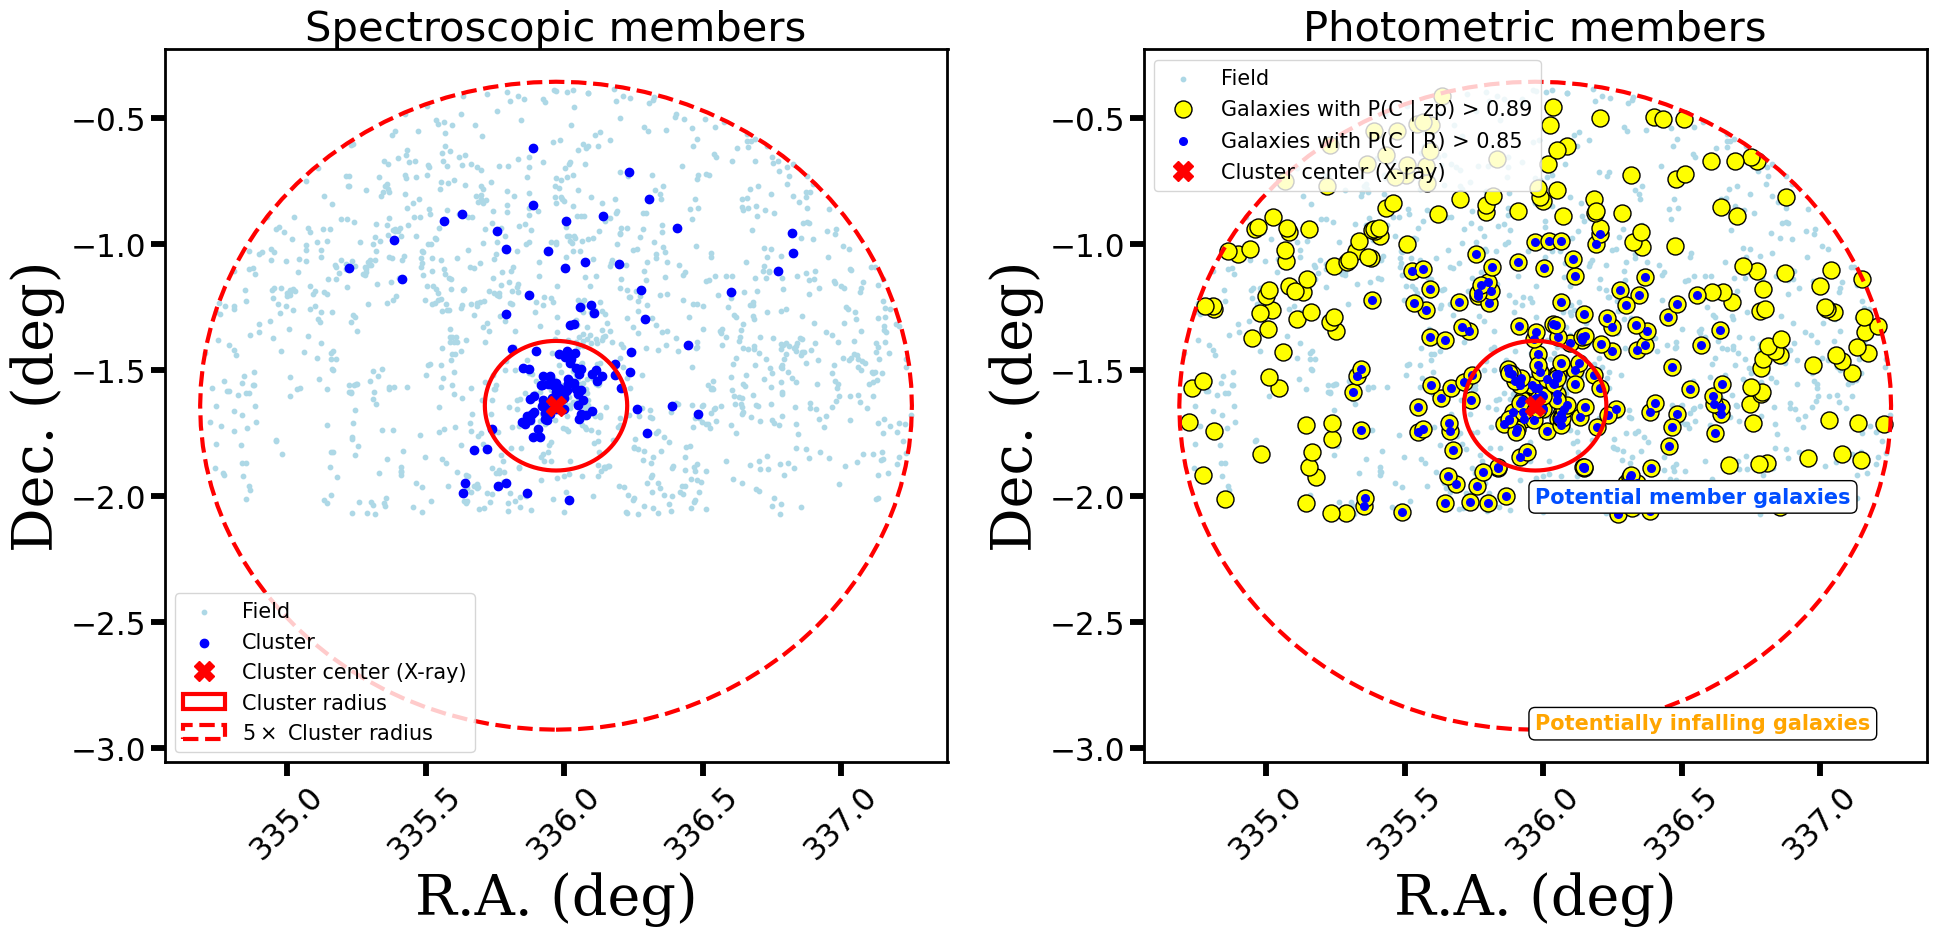

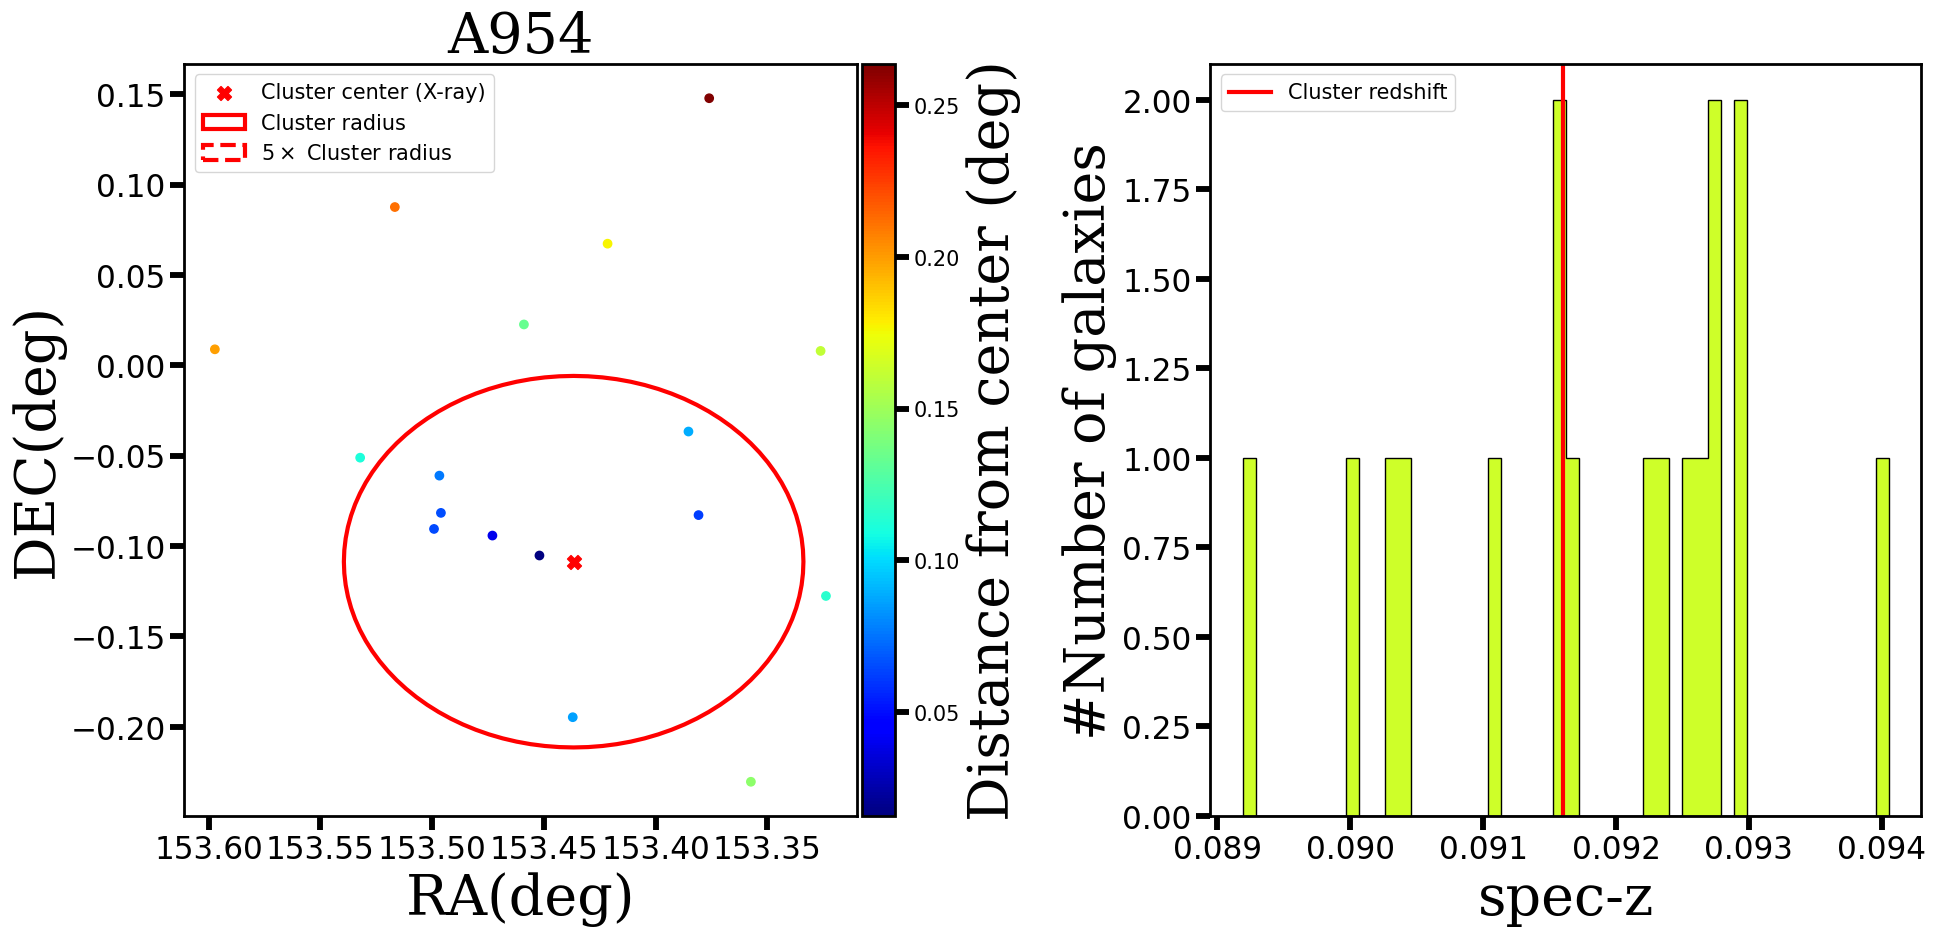

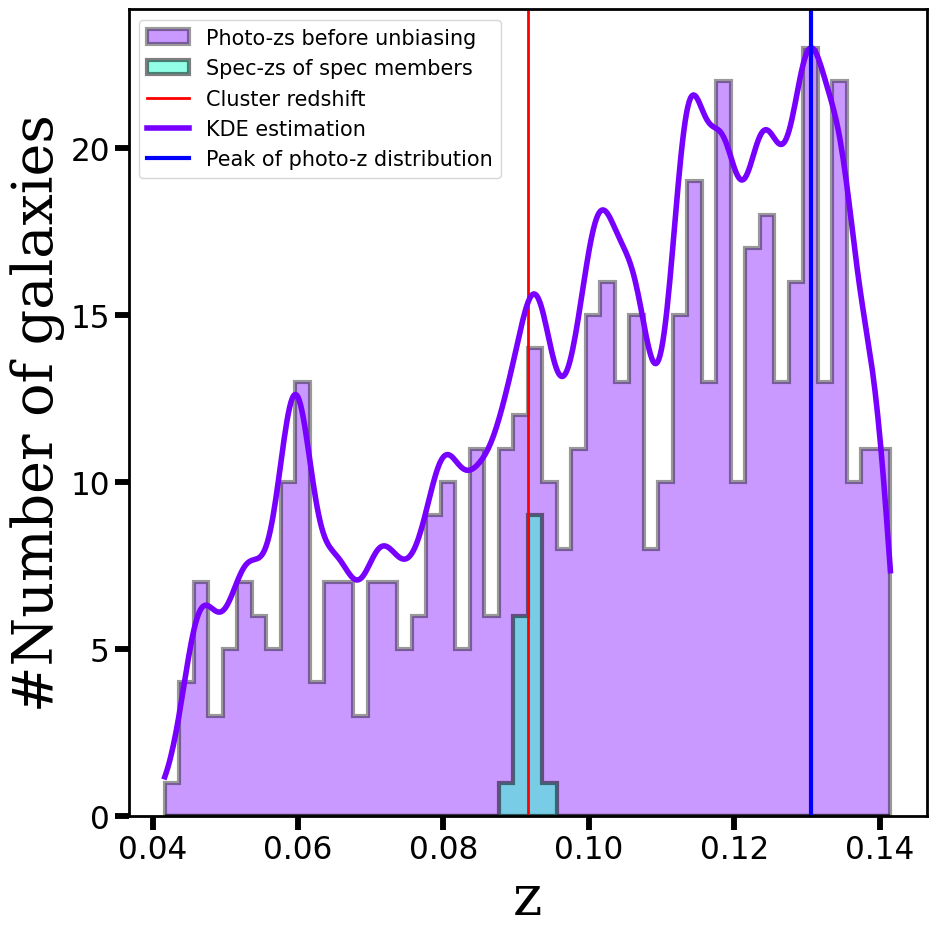

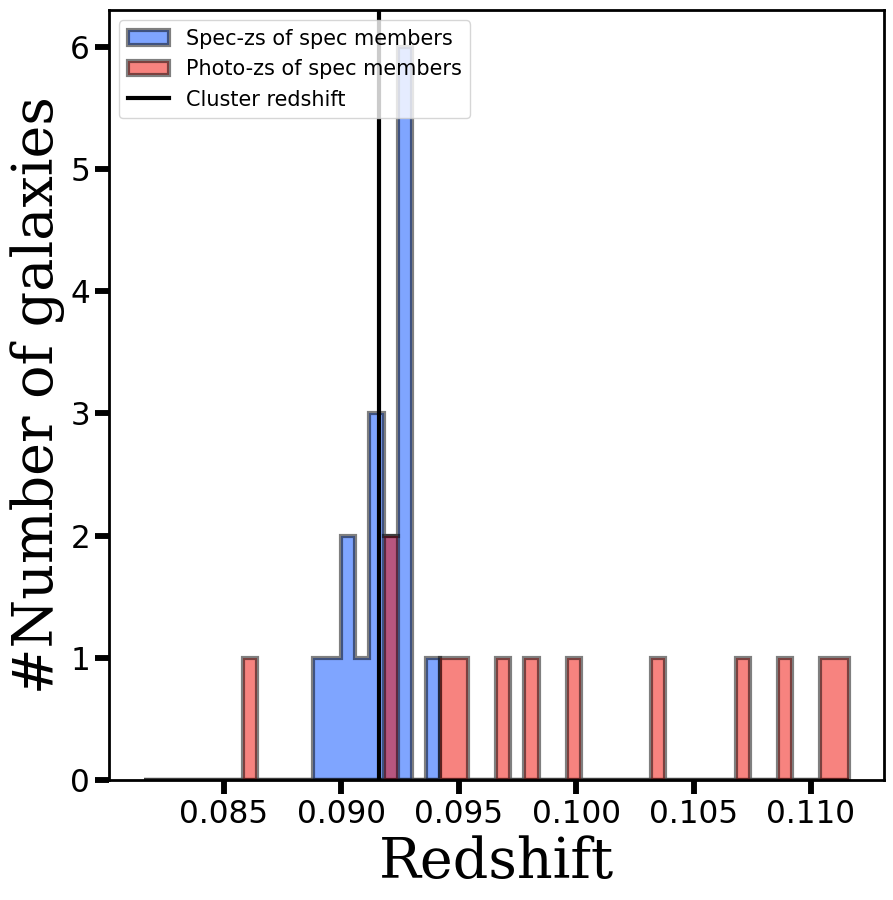

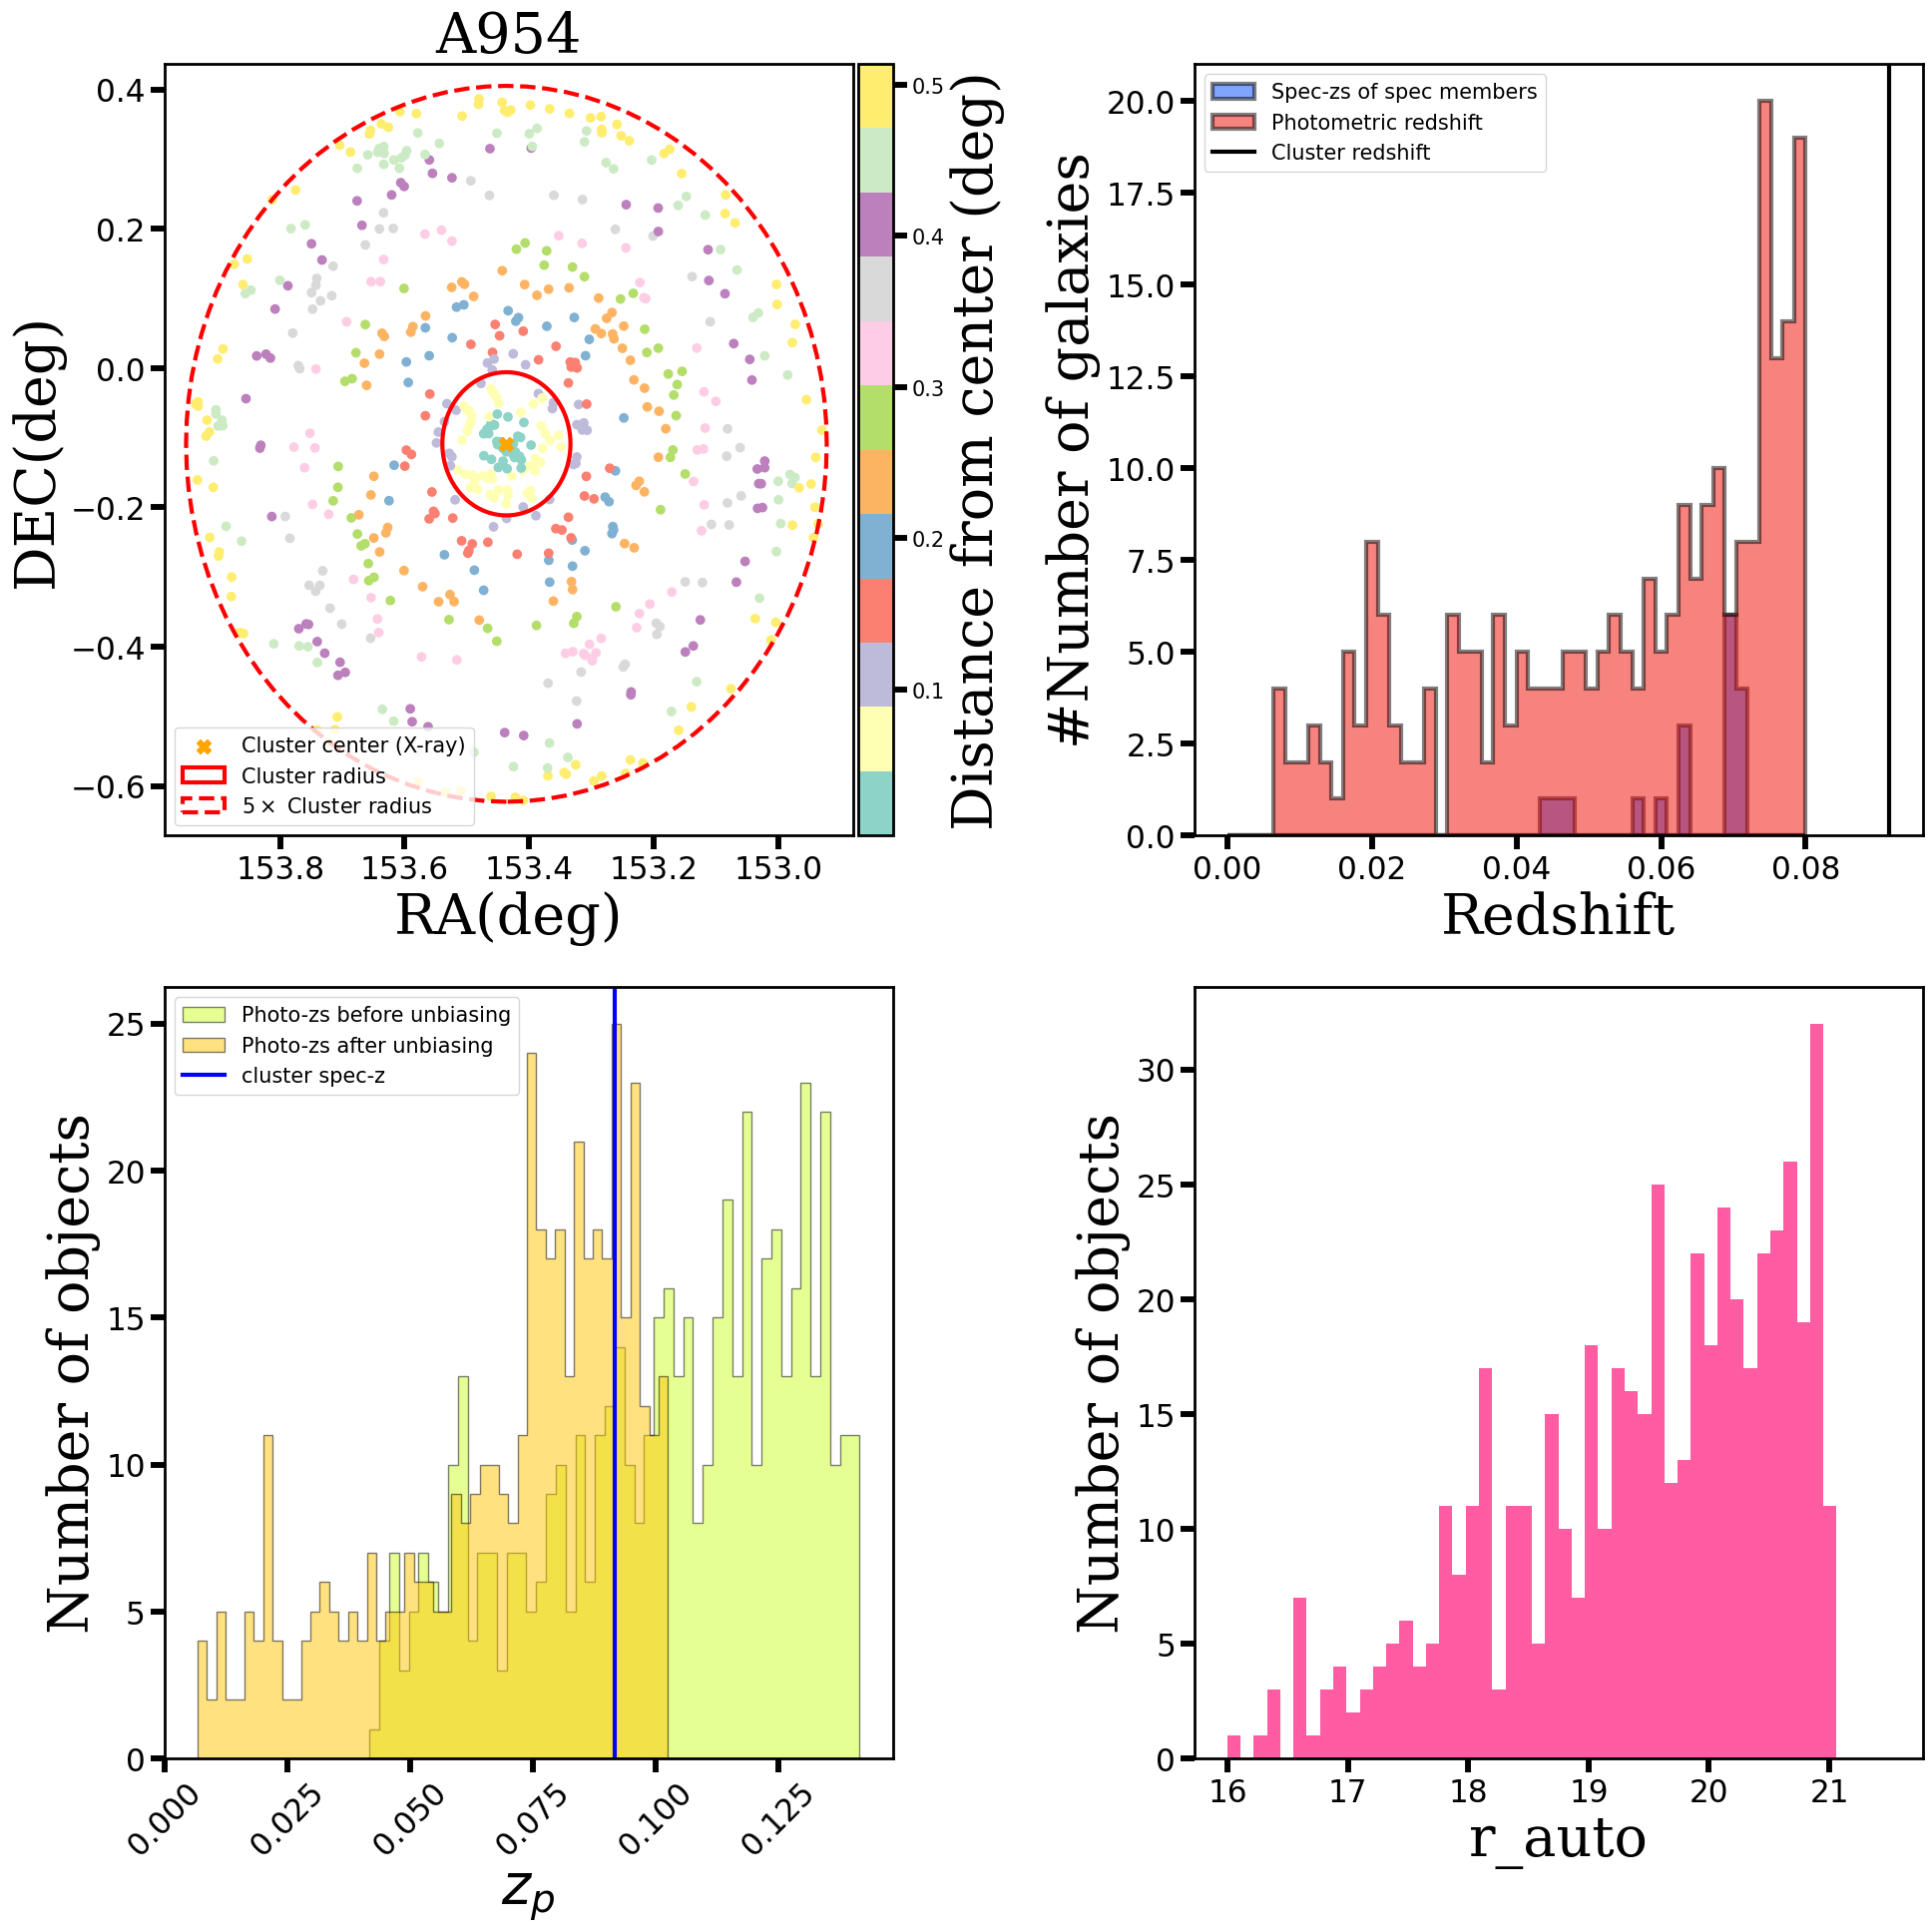

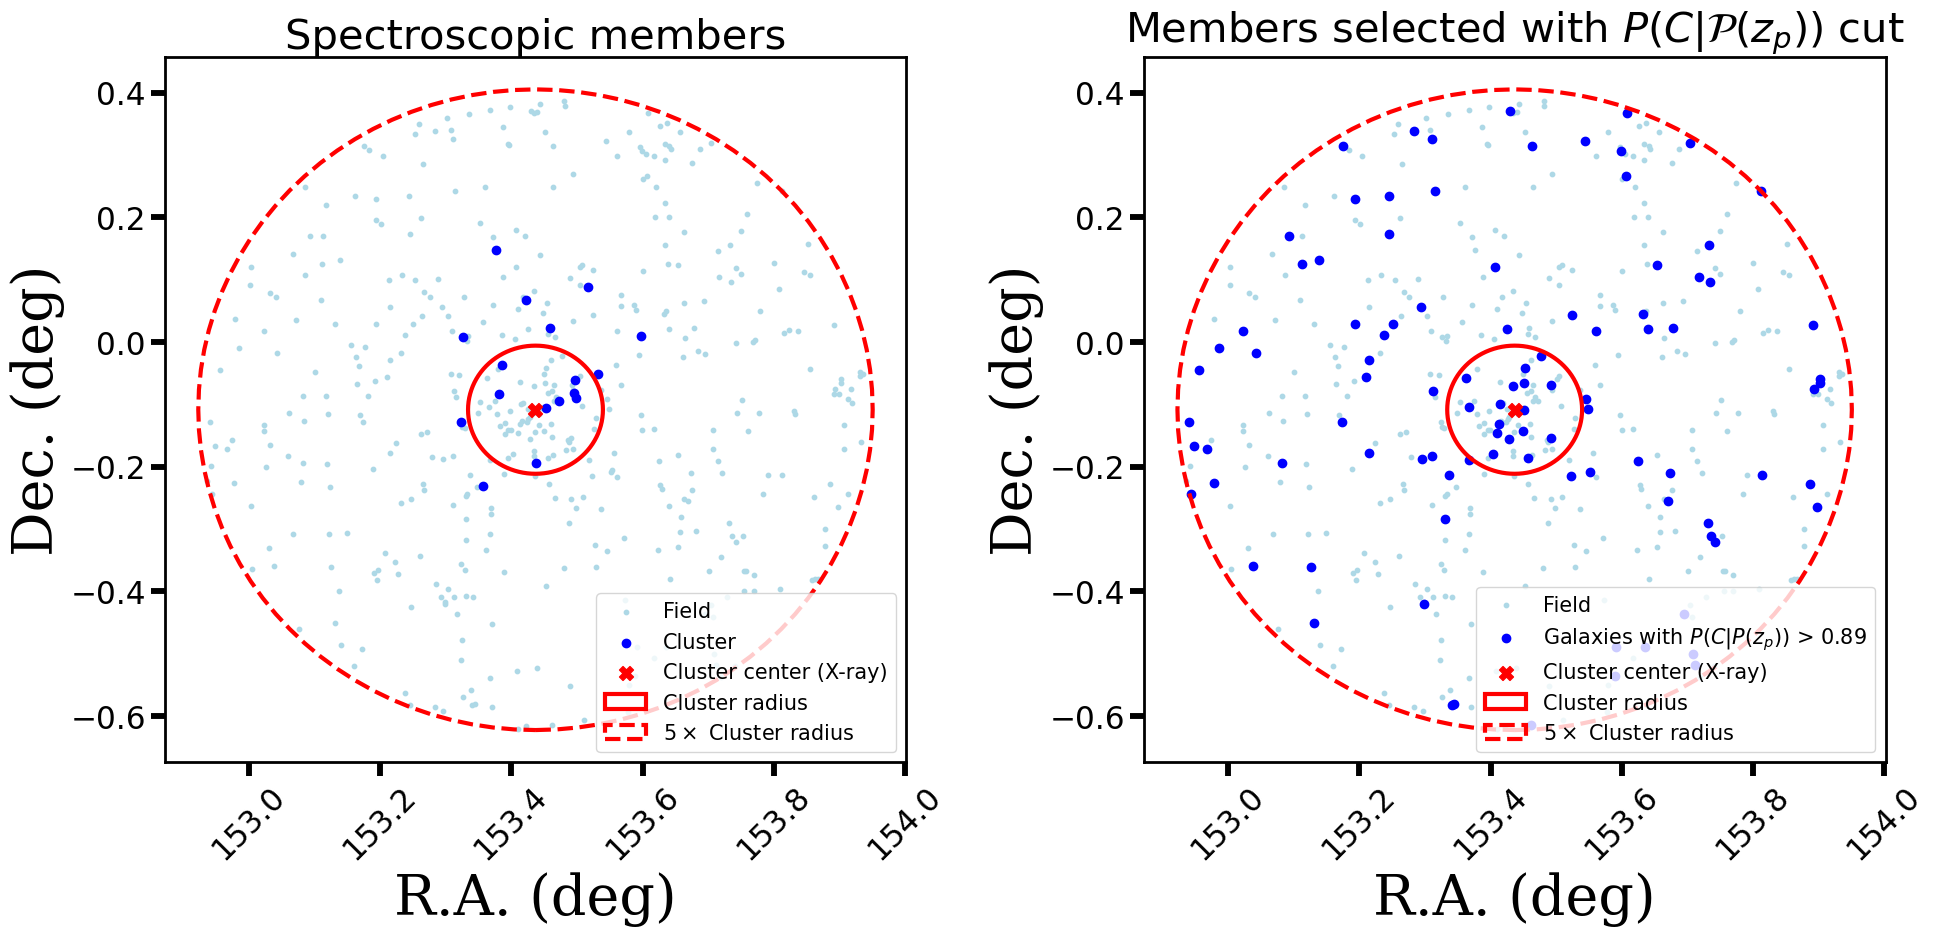

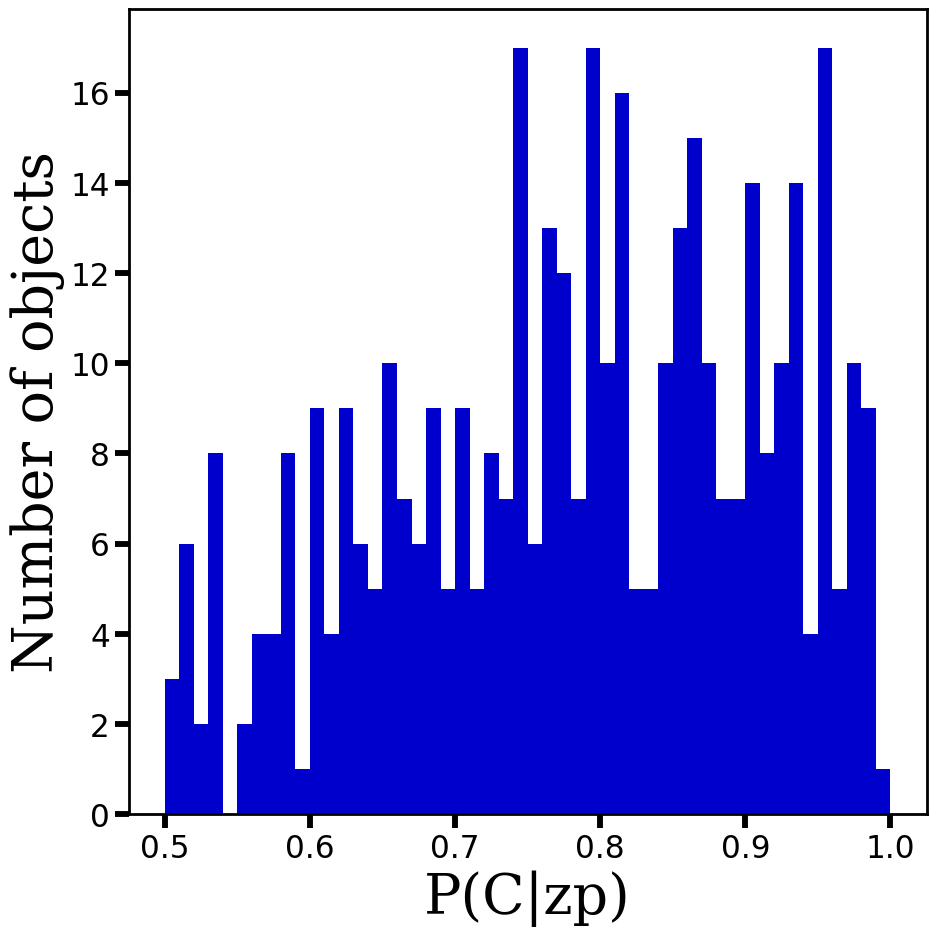

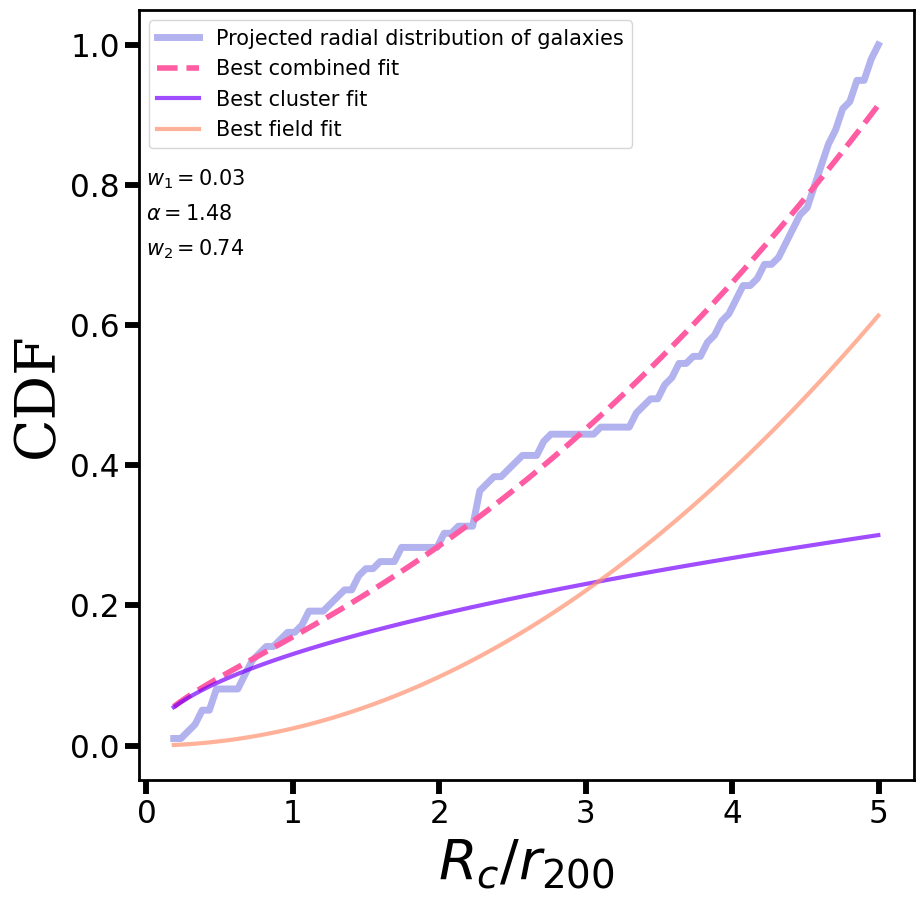

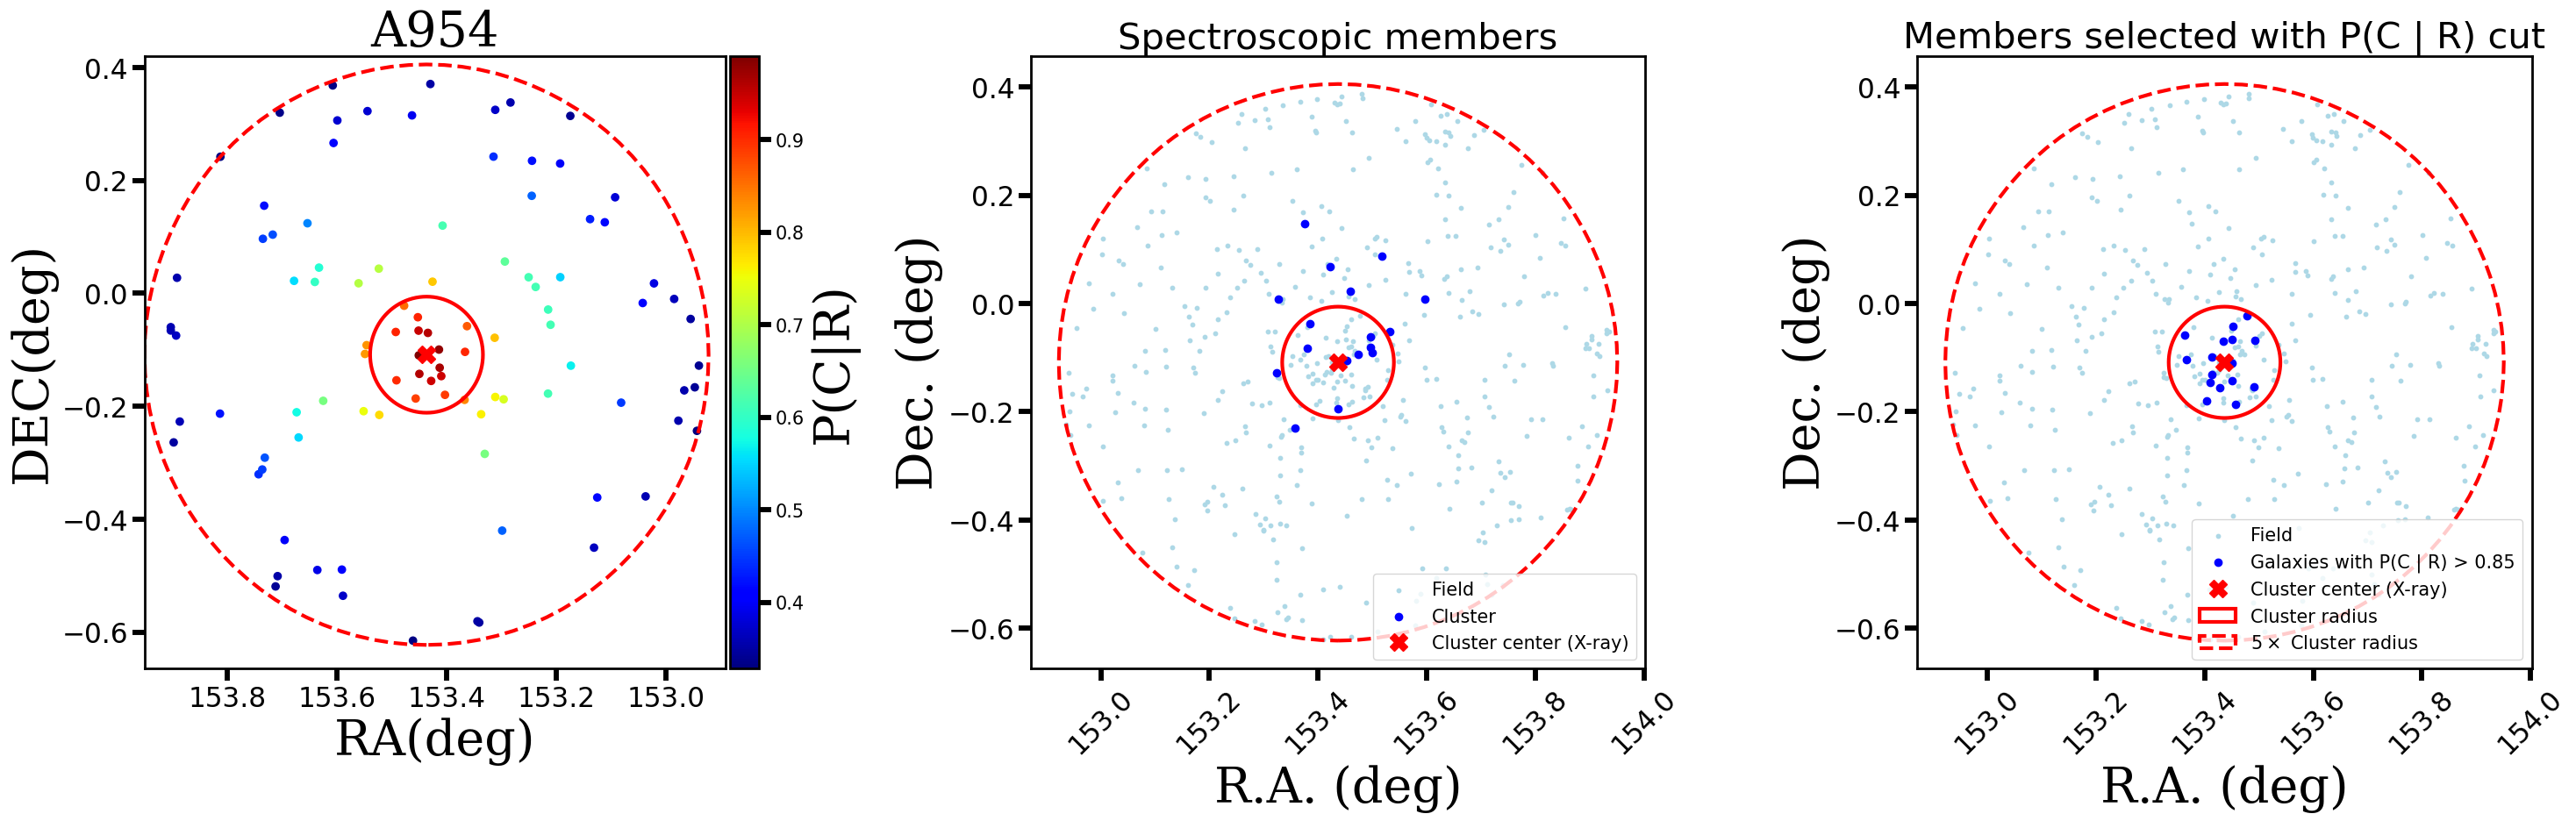

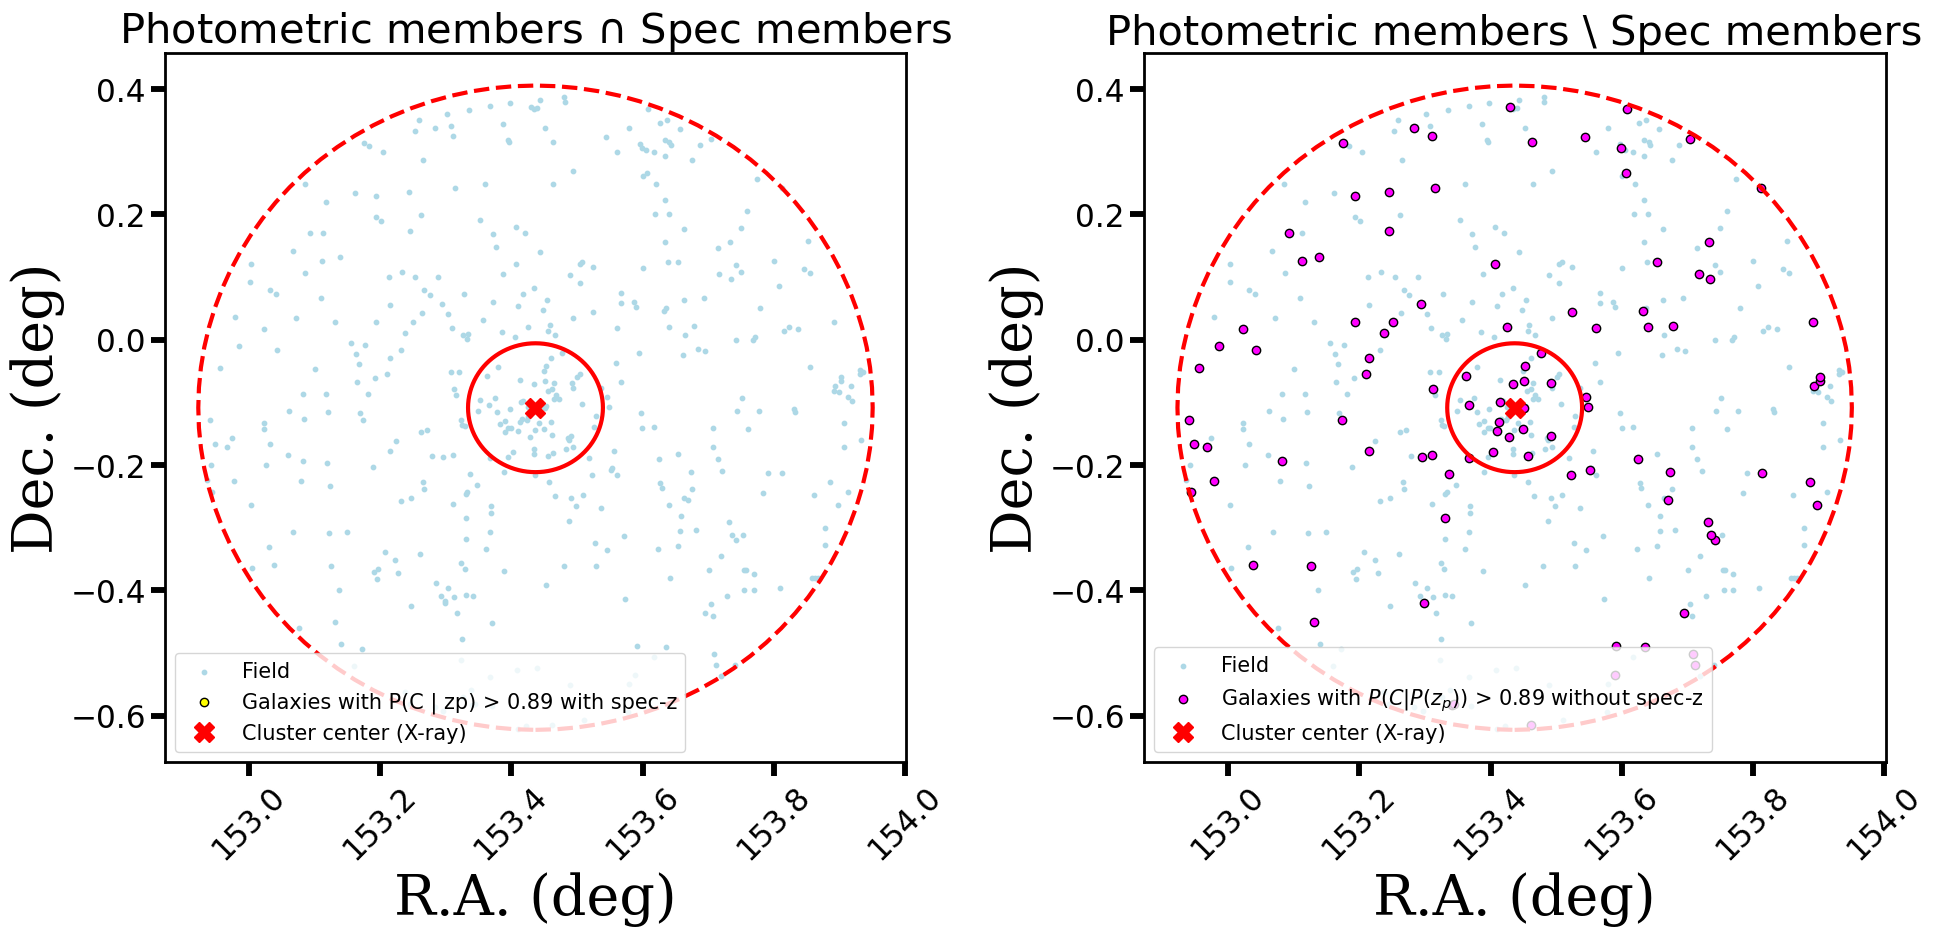

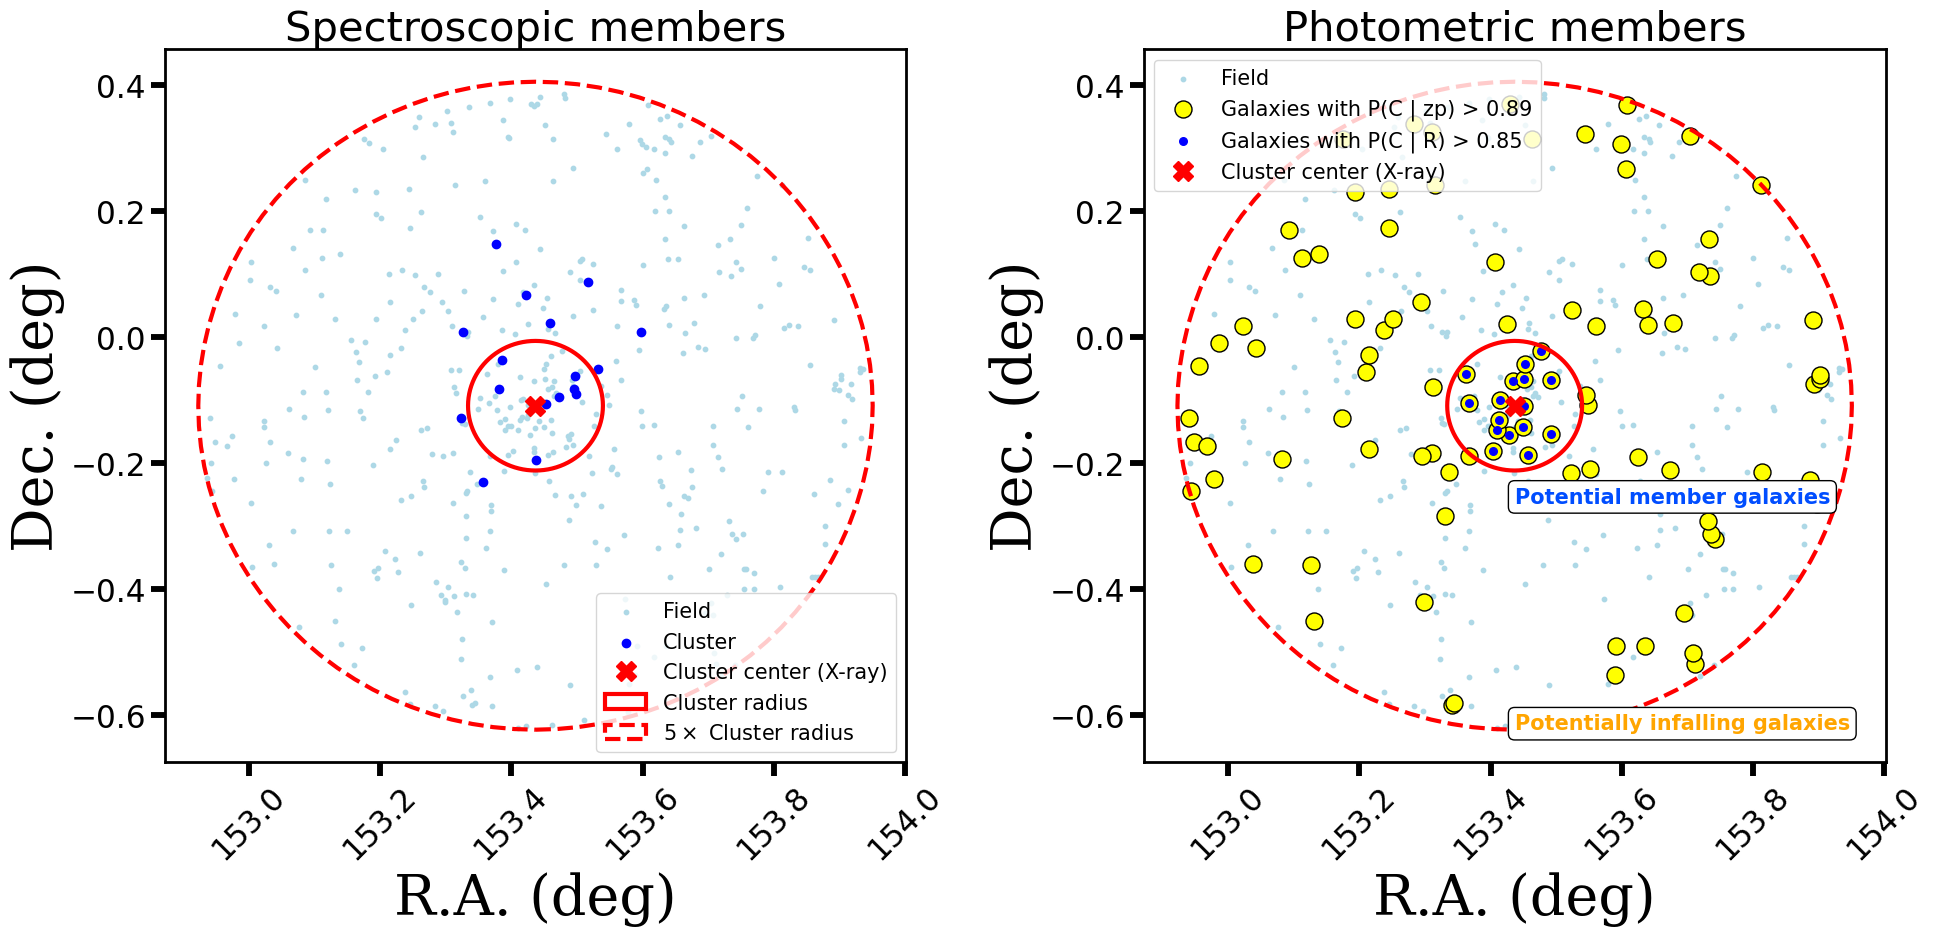

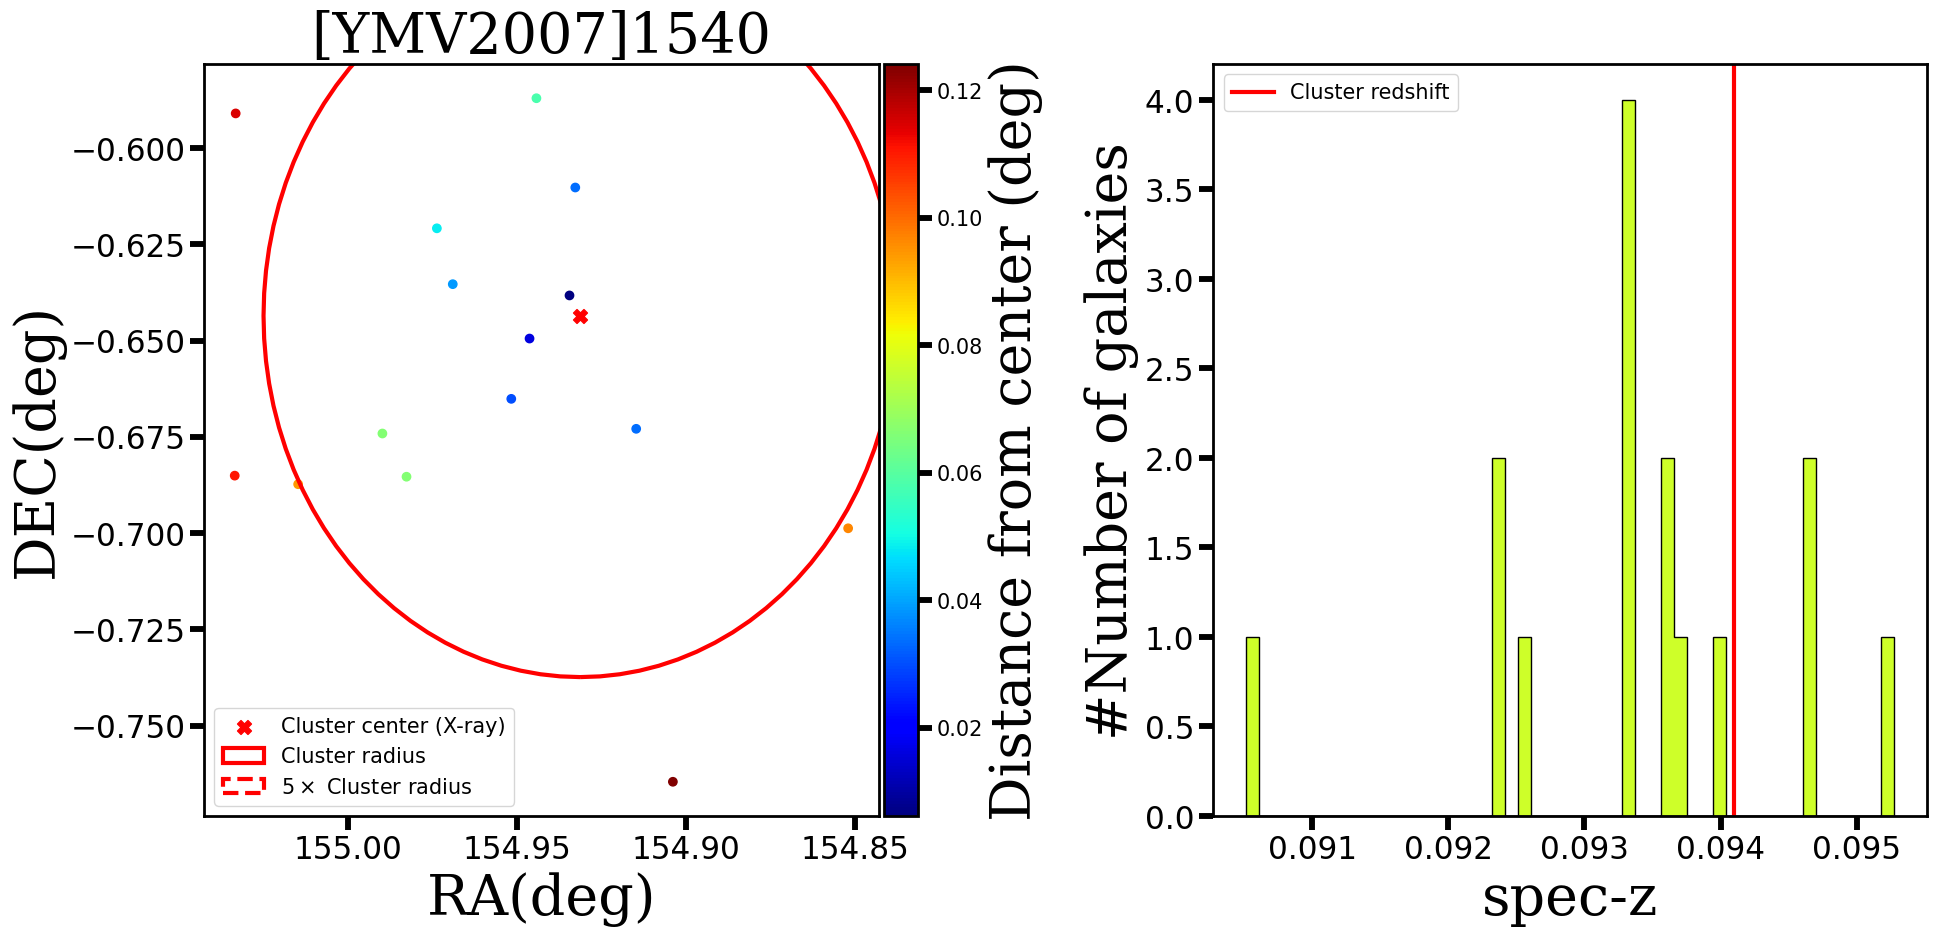

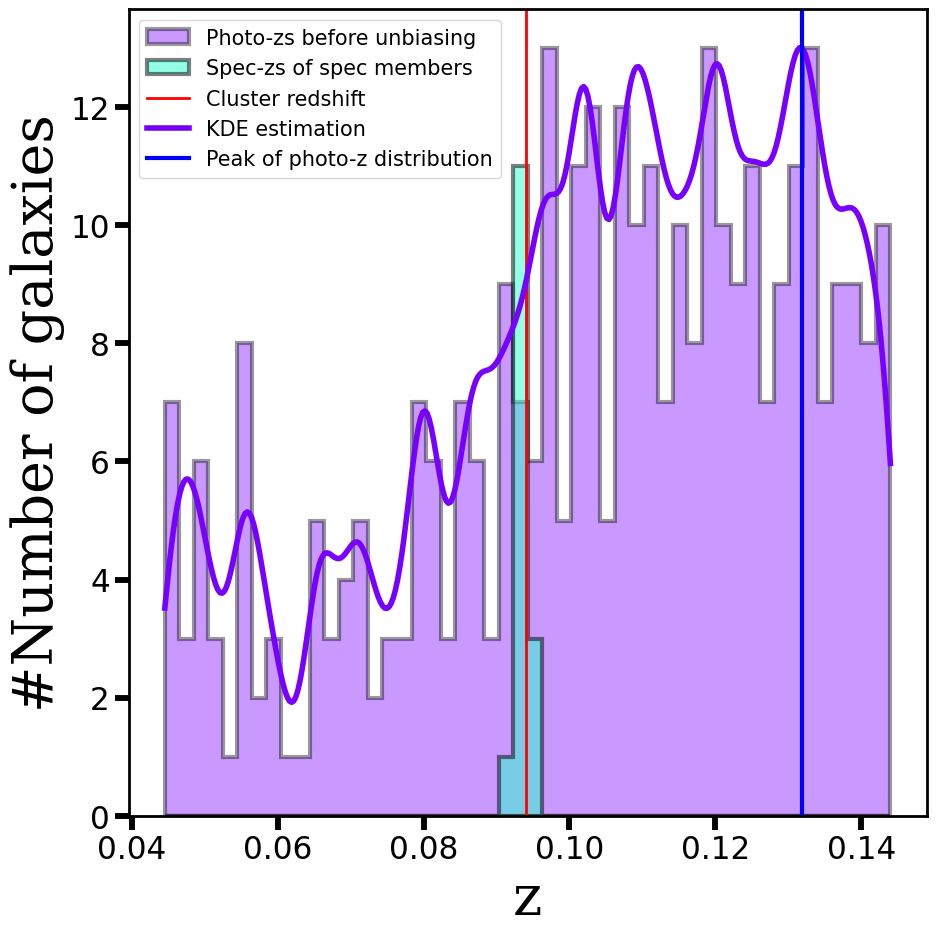

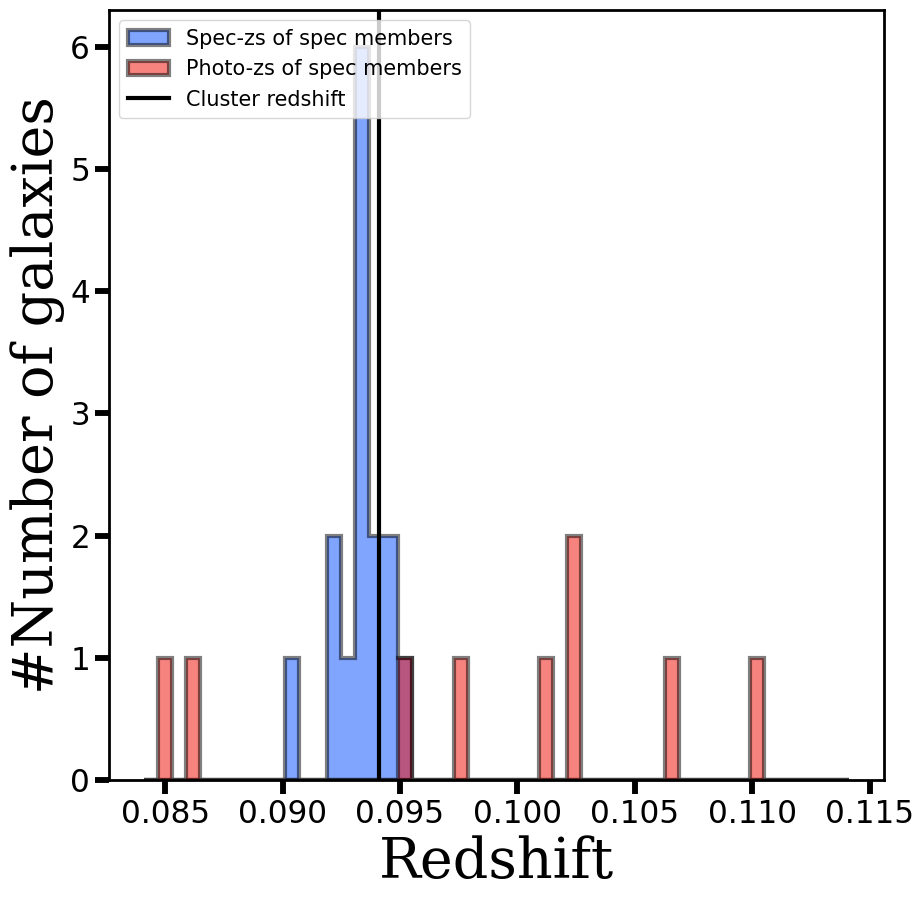

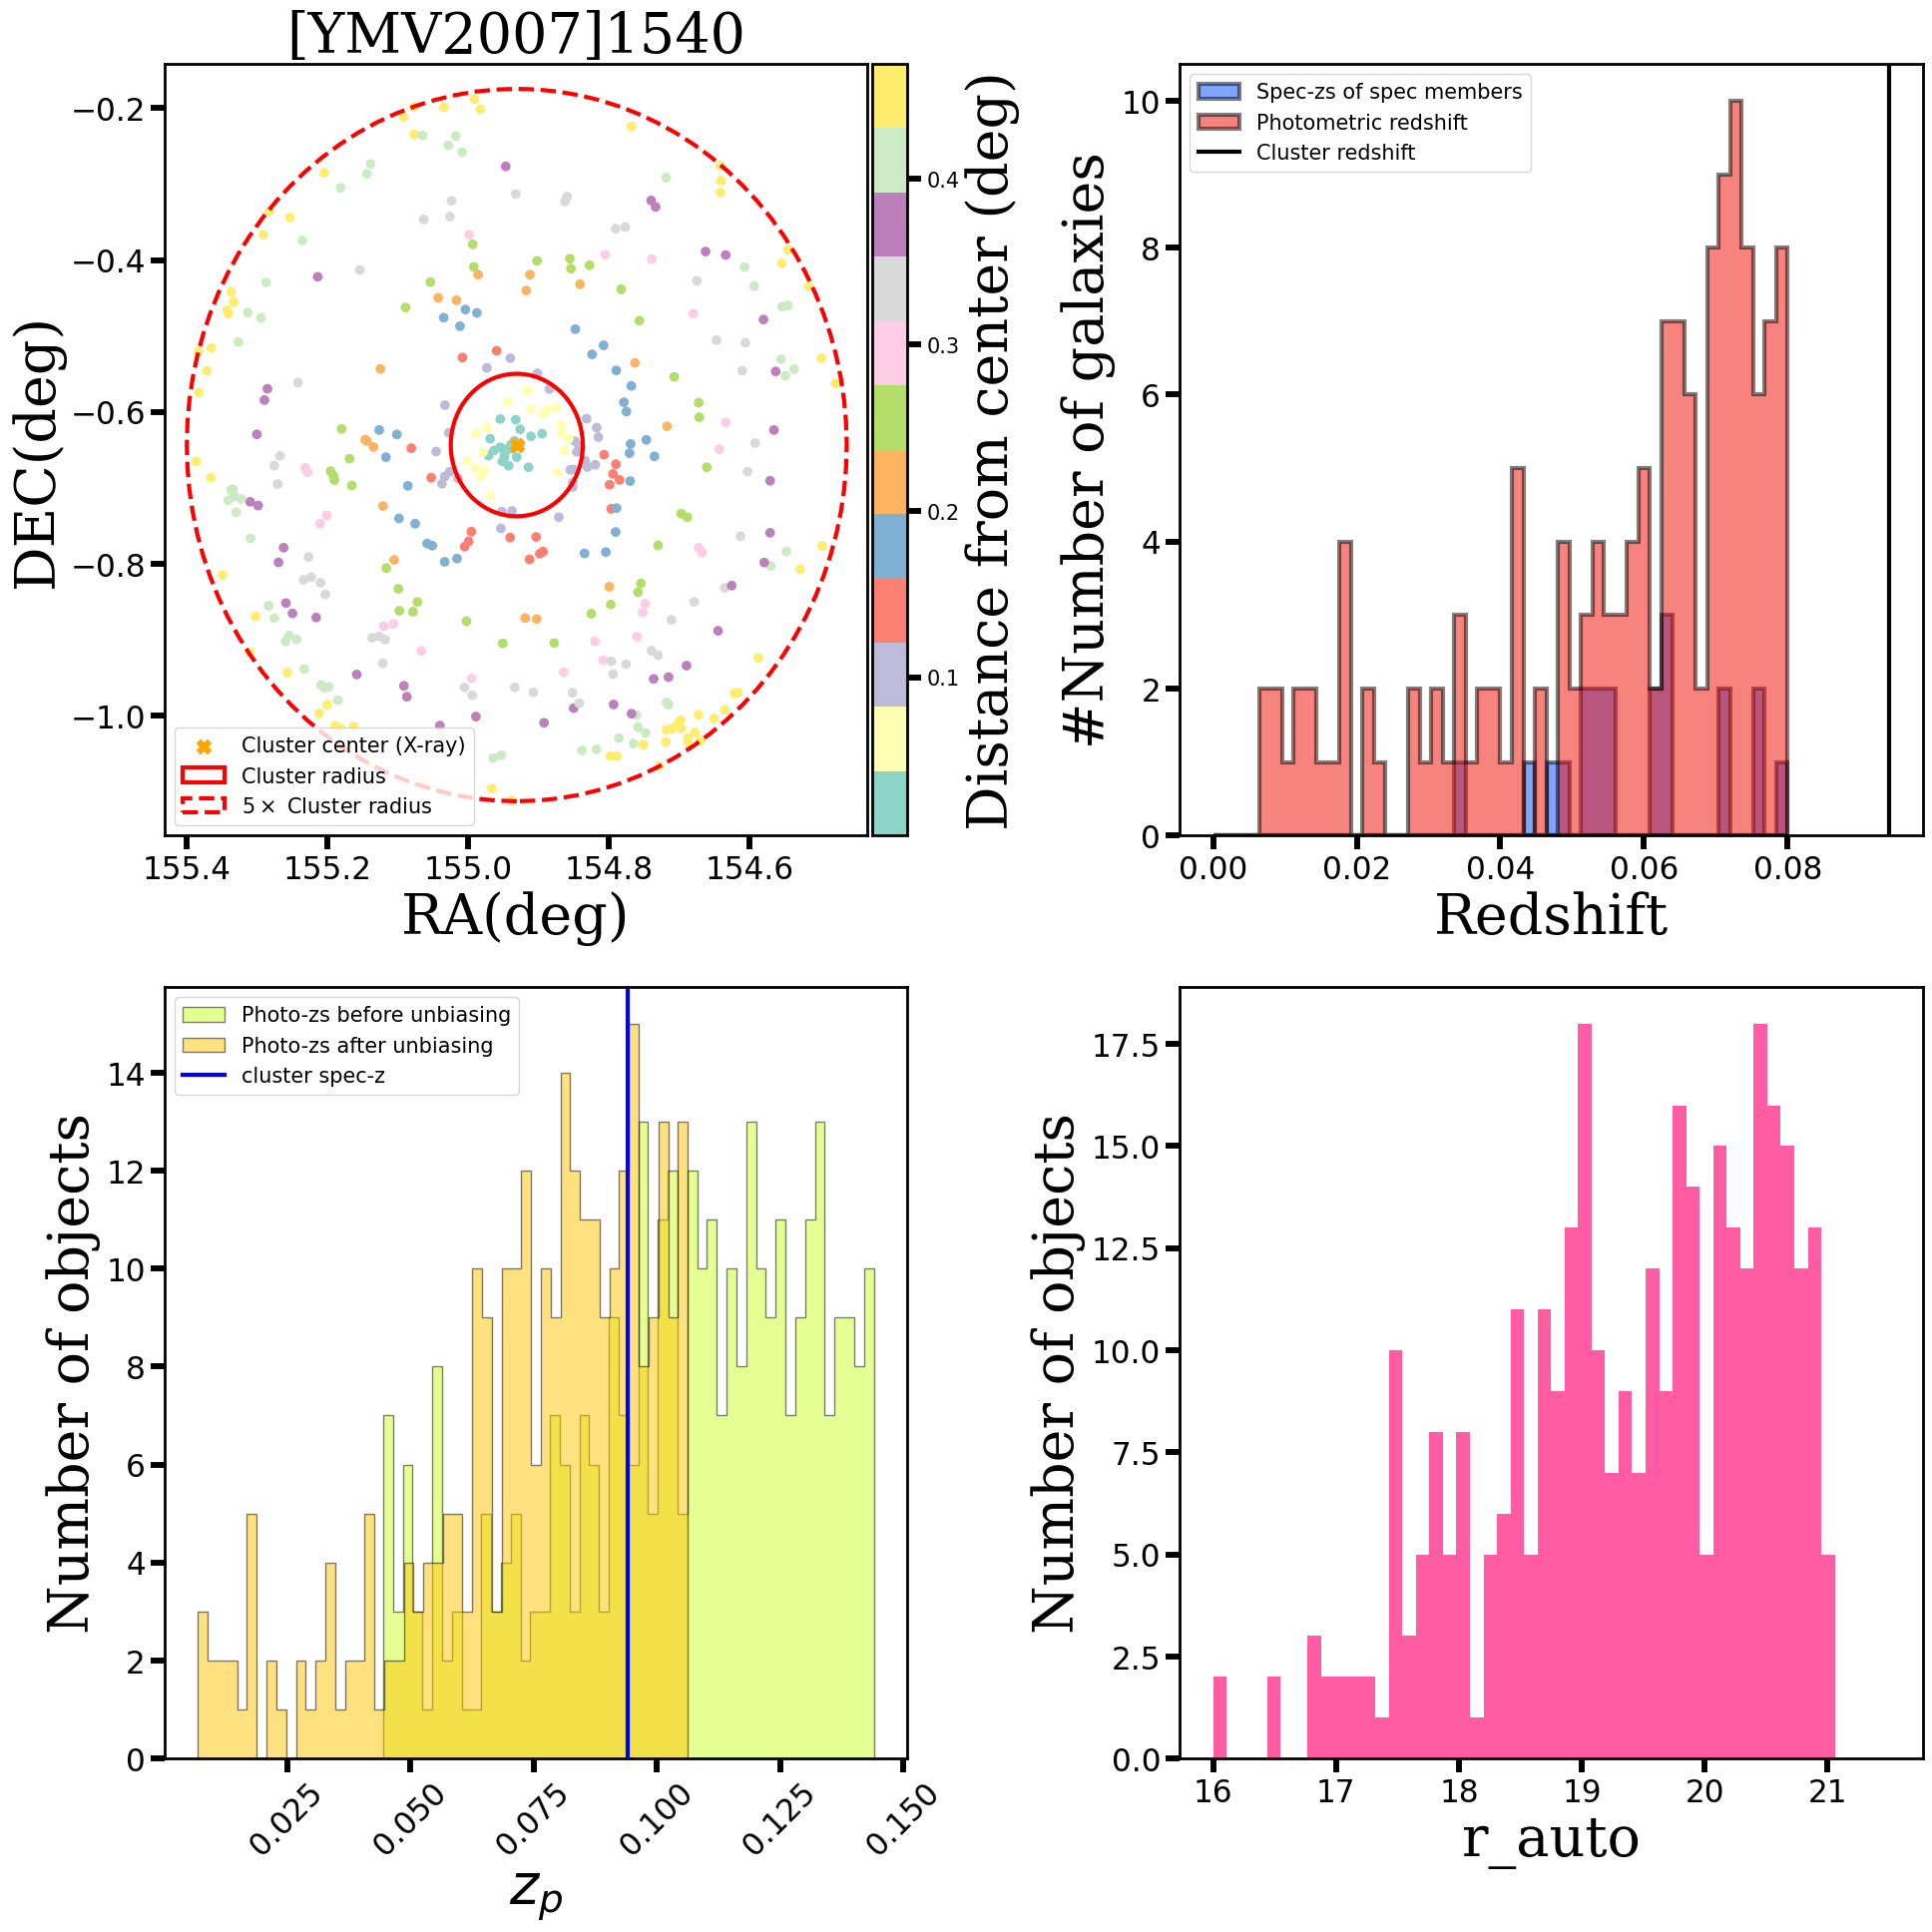

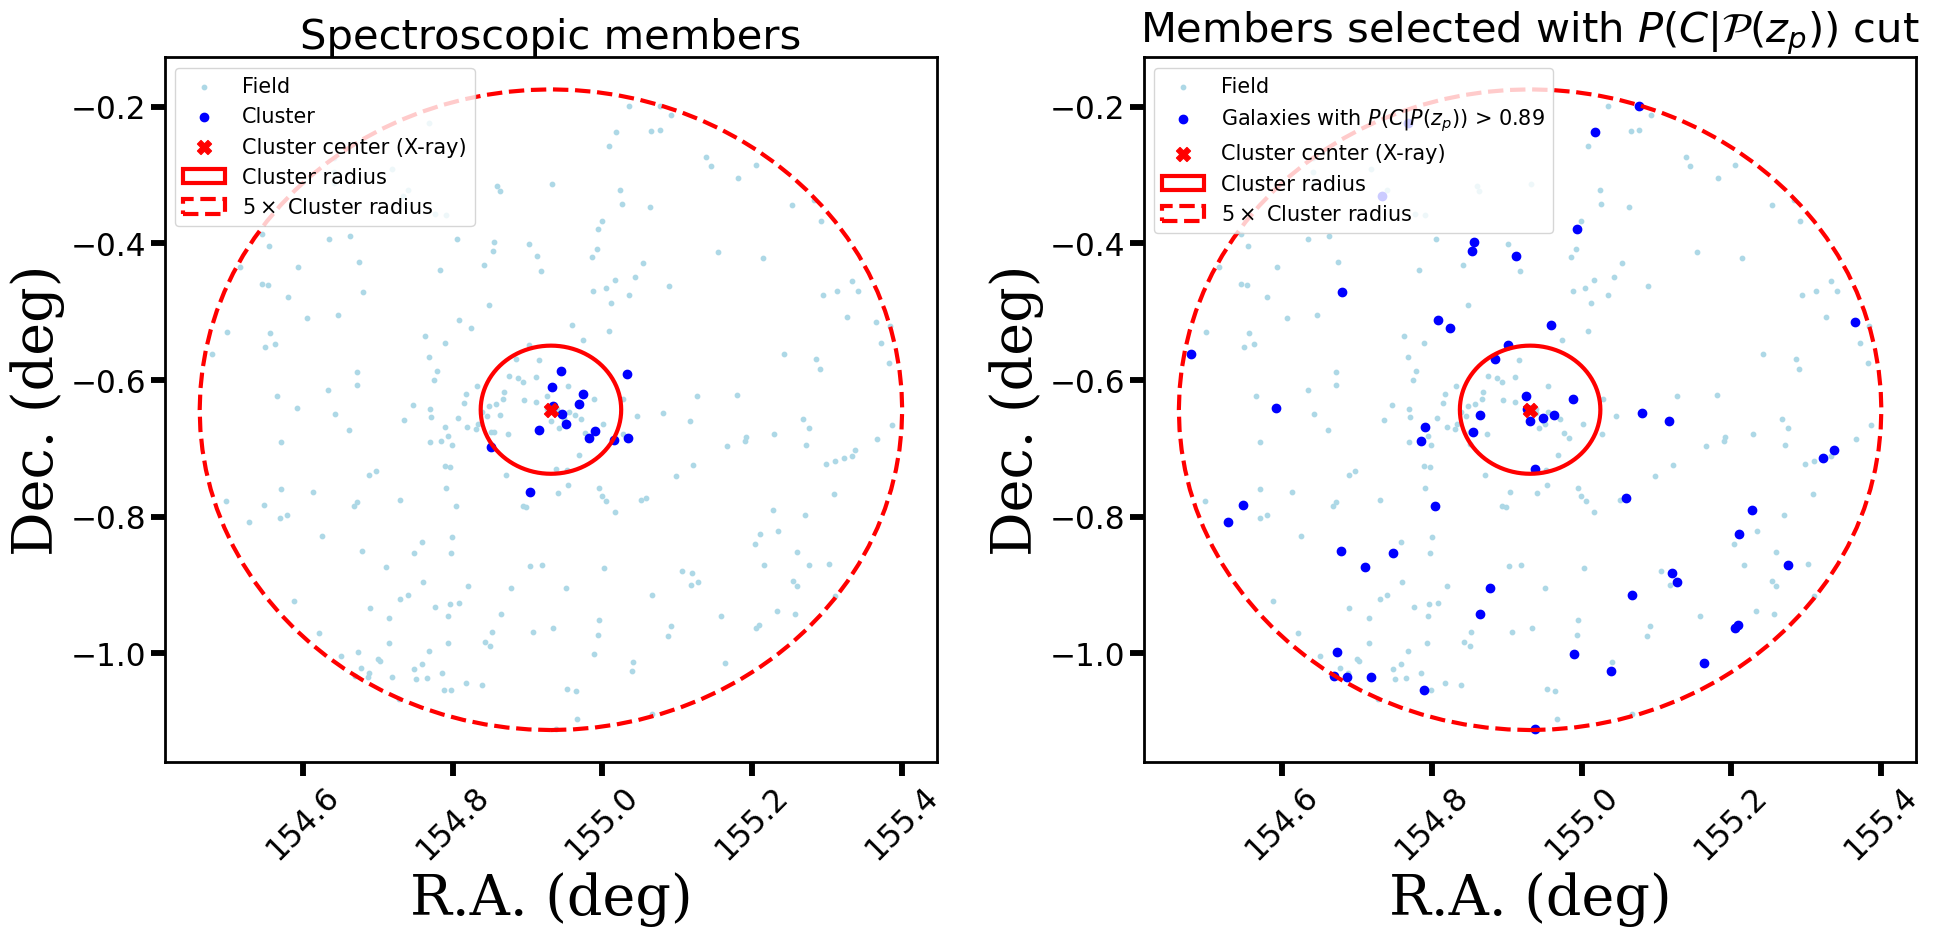

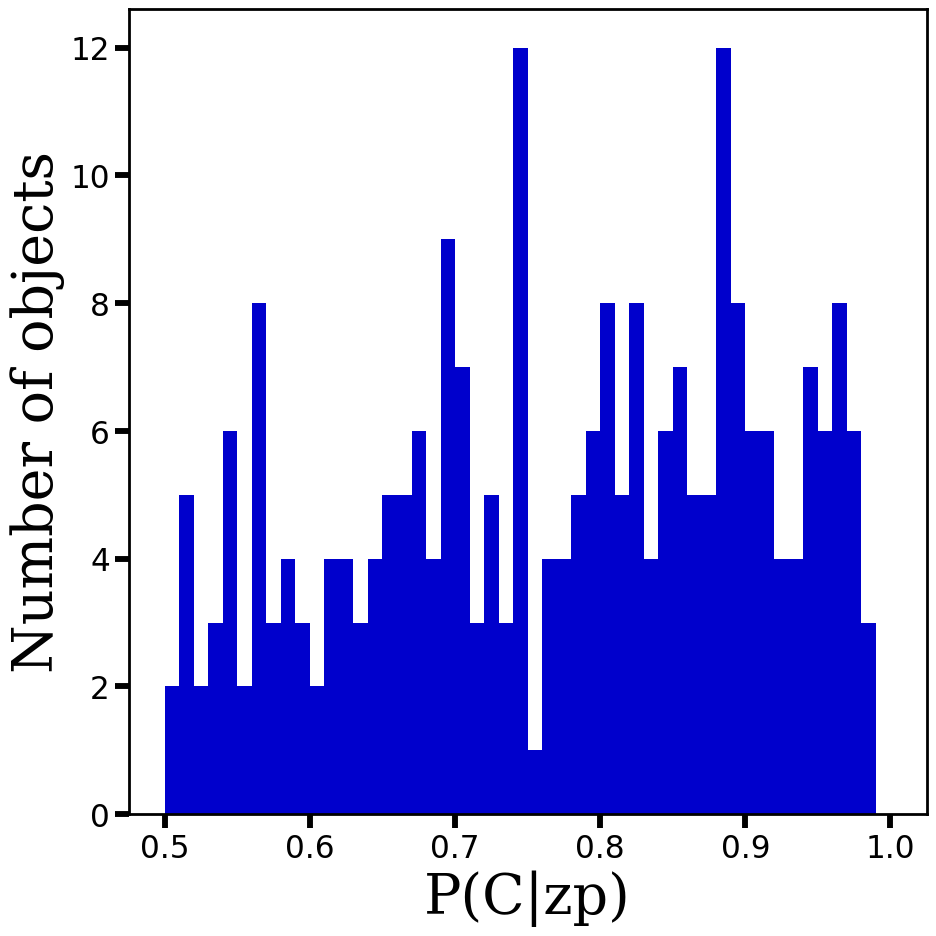

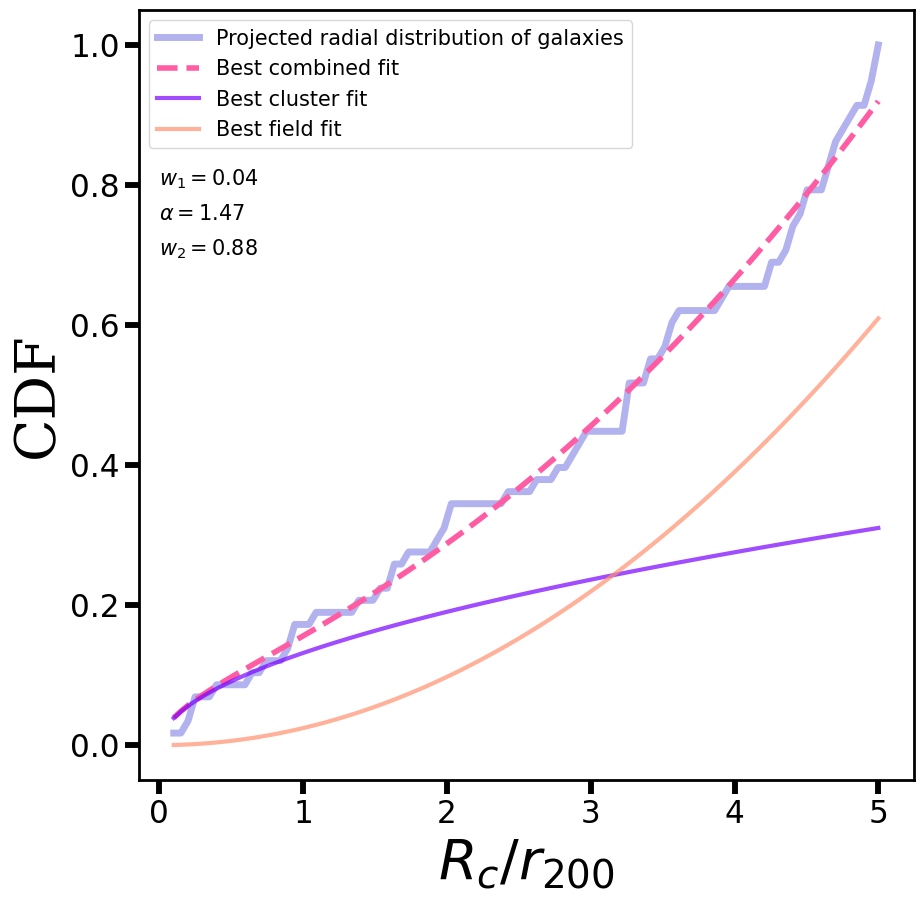

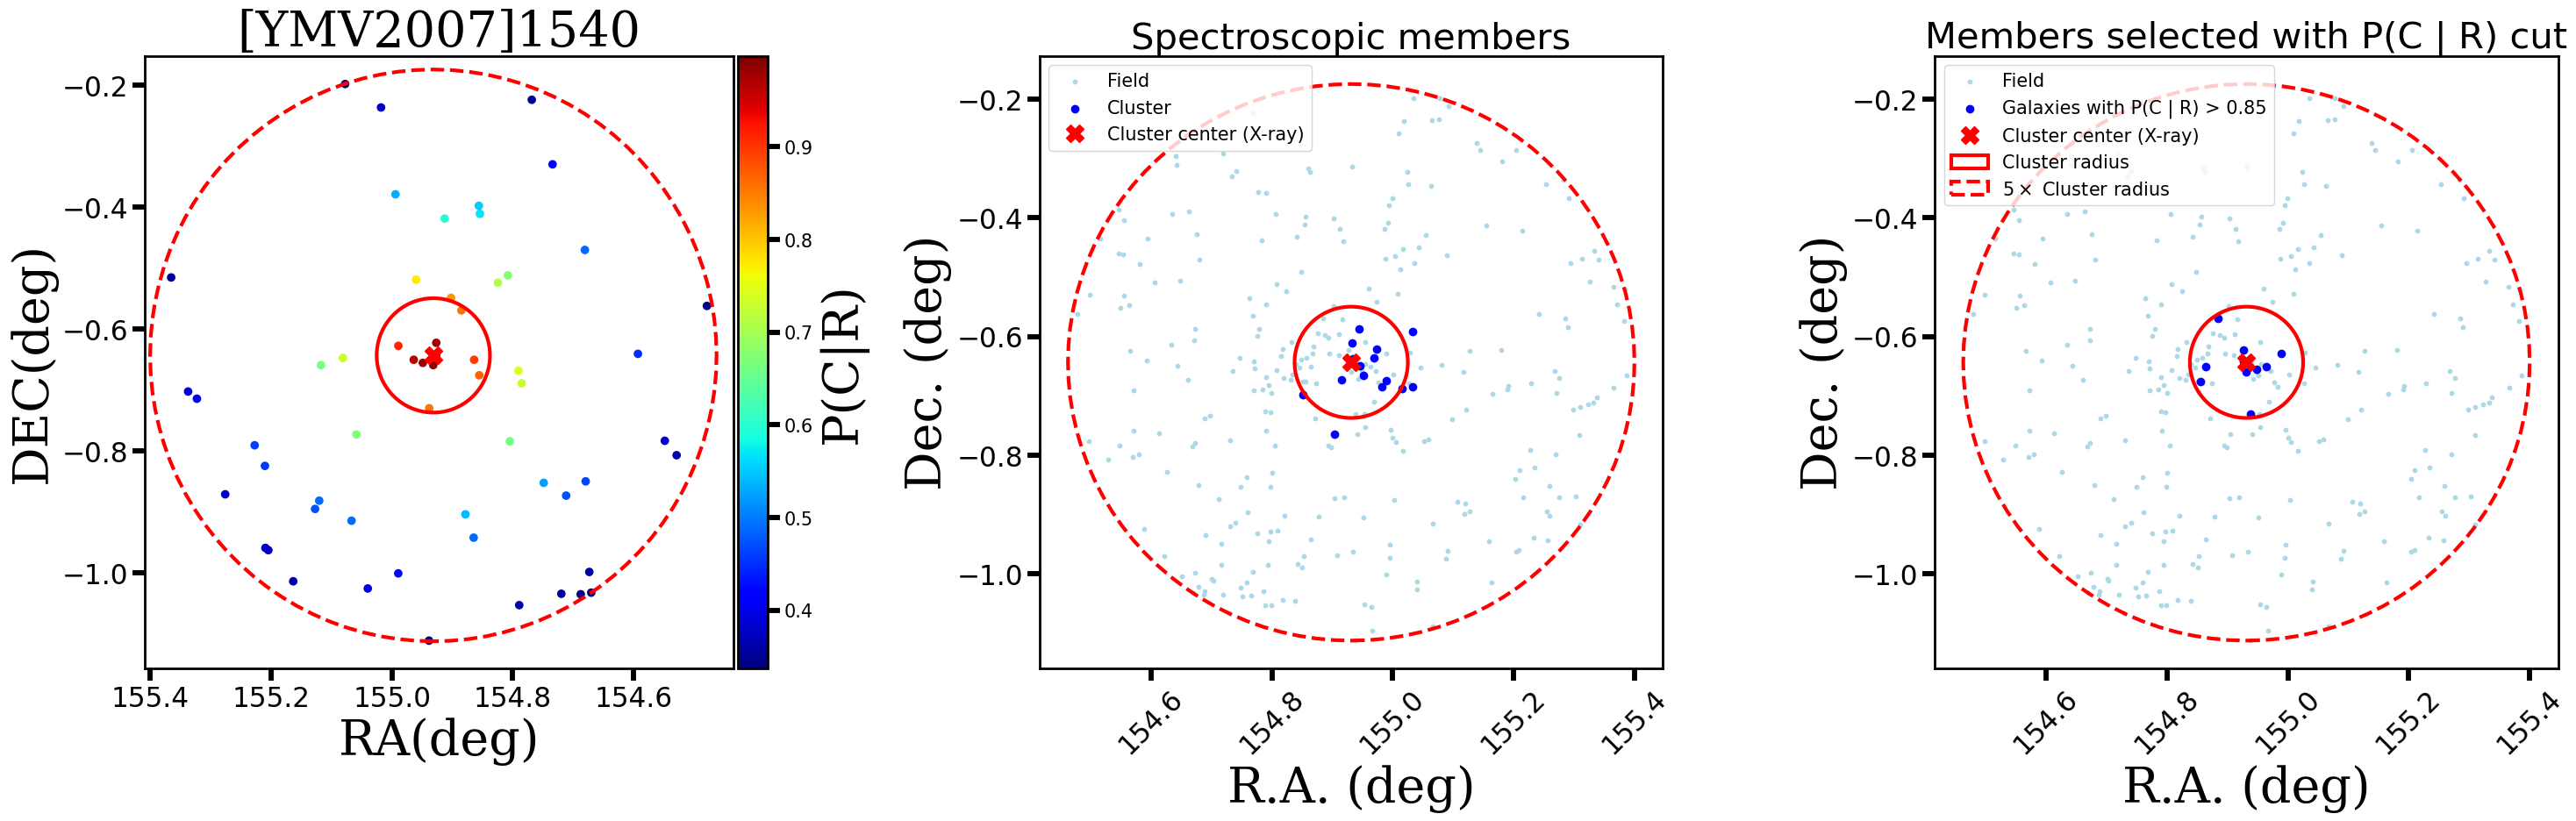

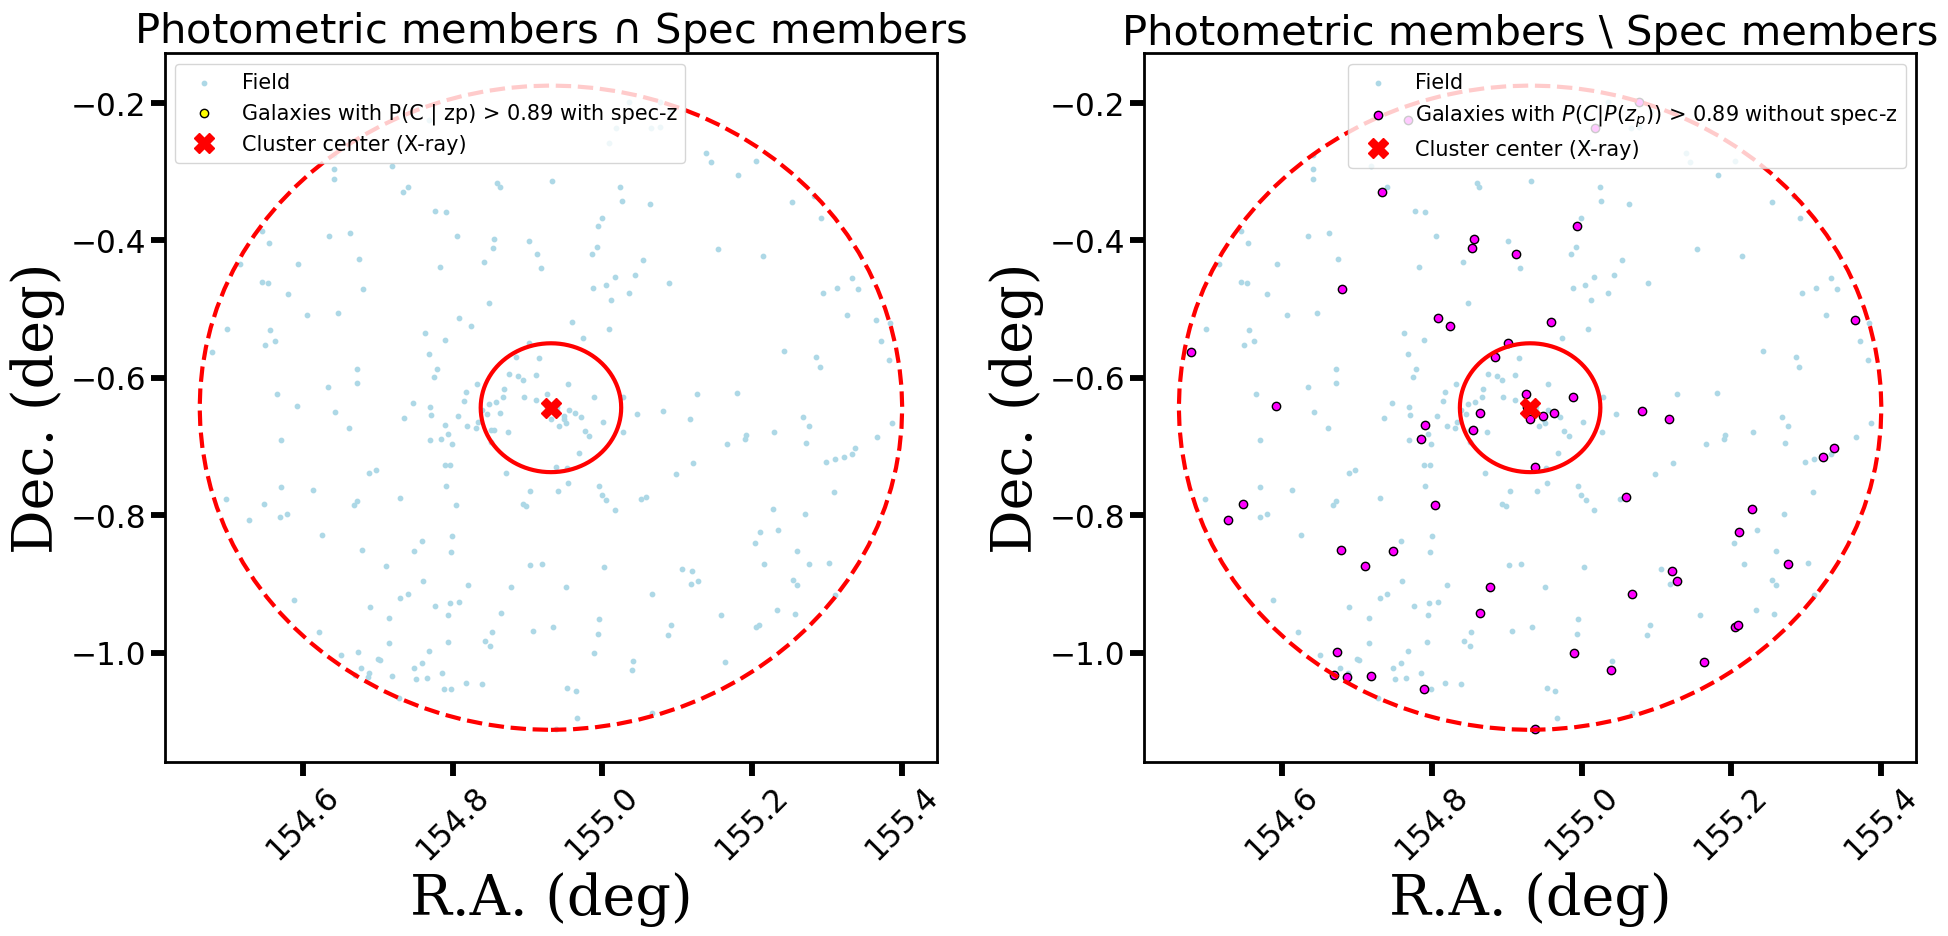

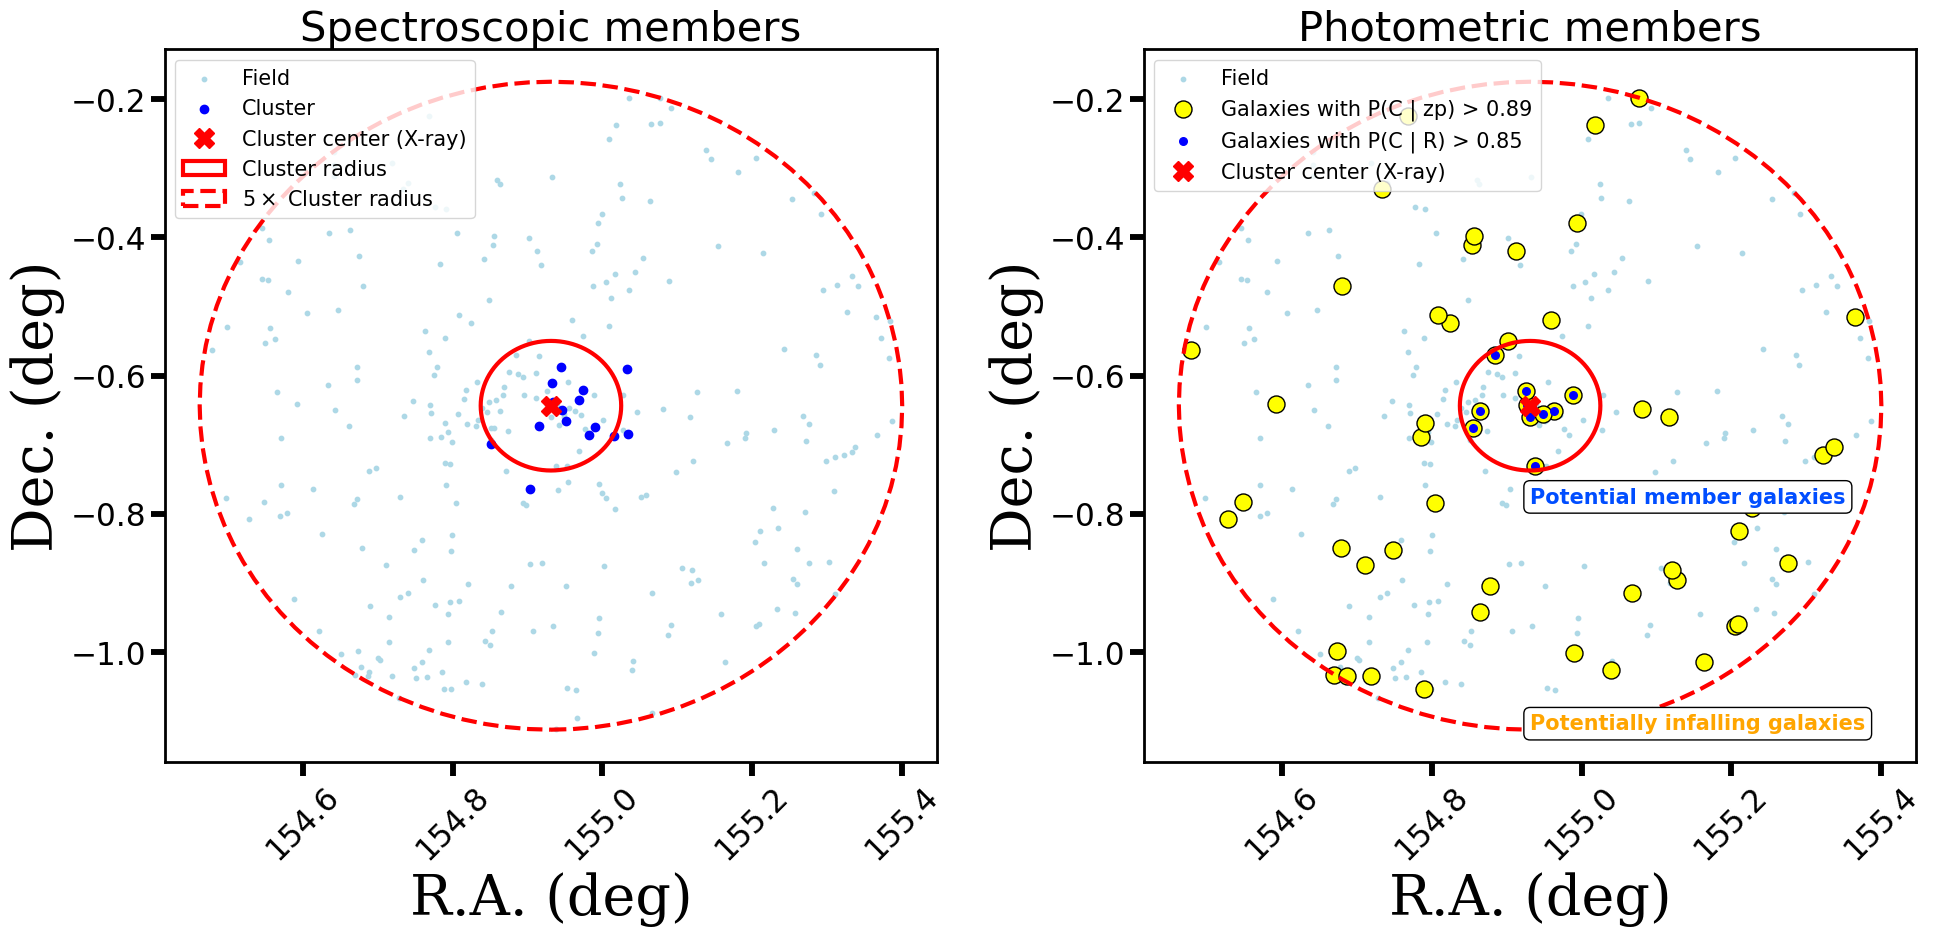

In [19]:
for cluster, i in zip(cl_names[-3:], np.arange(len(cl_names))[-3:]):
    
    radius_cluster = cl_r200_deg[i]
    z_cluster = cl_z[i]
    ra0 = cl_ra[i]
    dec0 = cl_dec[i]
    
    t = pd.read_csv("tables/splash+5r200/{}+5r200.csv".format(cluster))    

    print("Loading data for cluster {}".format(cluster))
    print("Cluster redshift: {:.4f}".format(z_cluster))
    print("Cluster radius: {:.2f} Kpc".format(cl_r200_mpc[i]))


    rauto = np.asarray(t["r_auto"])
    t = t[~np.isnan(rauto)]

    rauto = np.asarray(t["r_auto"])
    ra = np.asarray(t["ra"])
    dec = np.asarray(t["dec"])
    zml = np.asarray(t["zml"])
    pdf_weights = np.array([t[col_name] for col_name in ["pdf_weights_" + str(i) for i in range(0, 3)]])
    pdf_means = np.array([t[col_name] for col_name in ["pdf_means_" + str(i) for i in range(0, 3)]])
    pdf_stds = np.array([t[col_name] for col_name in ["pdf_stds_" + str(i) for i in range(0, 3)]])
    z = np.asarray(t["z"])
    flag_member = np.asarray(t["flag_member"])


    ra_specz_members = ra[flag_member == 0]
    dec_specz_members = dec[flag_member == 0]
    z_specz_members = z[flag_member == 0]
    zml_specz_members = zml[flag_member == 0]
    
    #Não tem porque impor uma limitação em raio ou em redshift nos membros espectroscópicos. 
    #Podemos plotar todos os membros espectroscópicos sem restrição
    dist_specz_members = clustercentric_distance(ra_specz_members, dec_specz_members, ra0, dec0)
    
    fig = plt.figure(figsize=(20, 10))

    ax1 = fig.add_subplot(121)

    sc1 = ax1.scatter(ra_specz_members, dec_specz_members, marker='o', c=dist_specz_members, cmap=cm.jet, rasterized=True)
    ax1.scatter(ra0, dec0, marker="X", s=100, color="red", label="Cluster center (X-ray)")
    ax1.set_xlabel('RA(deg)',fontdict=font)
    ax1.set_ylabel('DEC(deg)',fontdict=font)
    ax1.invert_xaxis()
    ax1.set_title(cluster, fontdict=font)

    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
    cbar.set_label(label="Distance from center (deg)", fontdict=font)
    cbar.ax.tick_params(labelsize=labelsize)

    c0 = SkyCoord(ra=ra0, dec=dec0, frame='icrs', unit='deg')
    r = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
    ax1.add_patch(r)
    r5 = SphericalCircle(c0, 5*radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label=r"$5 \times$ Cluster radius", edgecolor="red", facecolor="None", ls='--')
    ax1.add_patch(r5)

    ax1.legend(fontsize=labelsize)


    ax2 = fig.add_subplot(122)
    ax2.hist(z_specz_members, bins=50, color=colors1[5], histtype='stepfilled', edgecolor='k')
    ax2.set_xlabel('spec-z',fontdict=font)
    ax2.set_ylabel('#Number of galaxies',fontdict=font)
    ax2.axvline(z_cluster, color="red", lw=3, label="Cluster redshift")

    ax2.legend(fontsize=labelsize)

    fig.tight_layout(pad=3.0)

    plt.savefig("../figures/splash+5r200/RA_DEC_z_distribution_{}.png".format(cluster), dpi='figure', format='png')
    
    
    dist = clustercentric_distance(ra, dec, ra0, dec0)
    
    sigma_z = np.array([sigma_nmad_(r) for r in rauto])

    #Define the volume of the cluster
    #fz1 determines the extent of the "mask_cluster", fz2 determines the extent to compute P(C | zp), and fr defines the radial extent of the objects
    fz1 = 3.0
    fz2 = fz1
    fr = 5.0

    #This mask defines all galaxies in the fr*R200 projected area of the cluster and also imposes a magnitude limit to the galaxies
    mask_cluster_region = (dist < fr*radius_cluster) & (rauto < 21)

    #This one restricts the above mask to only the galaxies delimited by +/-fz*sigma from the cluster redshift, defining a list of candidate members
    mask_cluster = mask_cluster_region & (zml > z_cluster - fz1*sigma_z*(1+z_cluster)) & (zml < z_cluster + fz1*sigma_z*(1+z_cluster))
    
    
    #Photo-z bias computed by me
    z_bins = 50
    bw = (zml[mask_cluster].max() - zml[mask_cluster].min()) / z_bins

    kde = KernelDensity(kernel="gaussian", bandwidth=bw).fit(zml[mask_cluster][:, np.newaxis])
    zz_phot = np.linspace(zml[mask_cluster].min(), zml[mask_cluster].max(), len(zml[mask_cluster]))[:, np.newaxis]
    log_dens_zz_phot = kde.score_samples(zz_phot)

    zp_peak = zz_phot[np.argmax(np.exp(log_dens_zz_phot))]
    zp_bias = zp_peak - z_cluster

    zml_unbiased = zml - zp_bias

    mask_cluster_unbiased = mask_cluster_region & (zml_unbiased > z_cluster - 
                        fz1*sigma_z*(1+z_cluster)) & (zml_unbiased < z_cluster + fz1*sigma_z*(1+z_cluster))

    print("zp_bias = {}".format(zp_bias))
    
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(111)

    pz_hist = ax1.hist(zml[mask_cluster], bins=50, color=colors3[3], histtype='stepfilled', edgecolor='k', linewidth=3.0,
            range=[zml[mask_cluster].min(), zml[mask_cluster].max()], alpha=0.4, label="Photo-zs before unbiasing")[0]

    ax1.hist(z_specz_members, bins=50, color=colors1[3], histtype='stepfilled', edgecolor='k', alpha=0.5, linewidth=3.0,
            range=[zml[mask_cluster].min(), zml[mask_cluster].max()], label="Spec-zs of spec members")

    ax1.axvline(z_cluster, color="red", lw=2, label="Cluster redshift")

    f = pz_hist[np.argmax(pz_hist)] / np.exp(log_dens_zz_phot)[np.argmax(np.exp(log_dens_zz_phot))]
    ax1.plot(zz_phot, np.exp(log_dens_zz_phot)*f, lw=4, color=colors3[3], label="KDE estimation")
    ax1.axvline(zz_phot[np.argmax(np.exp(log_dens_zz_phot))], color="blue", lw=3, label="Peak of photo-z distribution")

    ax1.set_xlabel('z',fontdict=font)
    ax1.set_ylabel('#Number of galaxies',fontdict=font)
    ax1.legend(fontsize=labelsize)

    fig.tight_layout(pad=3.0)
    
    plt.savefig("../figures/splash+5r200/photoz-bias_{}.png".format(cluster), dpi='figure', format='png')
    
    
    fig = plt.figure(figsize=(10, 10))
    ax2 = fig.add_subplot(111)

    ax2.hist(z_specz_members[dist_specz_members < 5*radius_cluster], bins=z_bins, color=colors1[1], histtype='stepfilled', alpha=0.5, 
             range=[z_cluster-0.01, z_cluster+0.02], edgecolor='k', linewidth=3.0, label="Spec-zs of spec members")
    ax2.hist(zml_specz_members[dist_specz_members < 5*radius_cluster], bins=z_bins, color=colors1[8], histtype='stepfilled', alpha=0.5, 
             range=[z_cluster-0.01, z_cluster+0.02], edgecolor='k', linewidth=3.0, label="Photo-zs of spec members")

    ax2.set_xlabel('Redshift',fontdict=font)
    ax2.set_ylabel('#Number of galaxies',fontdict=font)
    ax2.axvline(z_cluster, color="black", lw=3, label="Cluster redshift")
    ax2.legend(fontsize=15, loc=2)
    
    plt.savefig("../figures/splash+5r200/specz-photoz_{}.png".format(cluster), dpi='figure', format='png')
    
    
    bins = 50
    fig = plt.figure(figsize=(20, 20))

    ax1 = fig.add_subplot(221)
    sc1 = ax1.scatter(ra[mask_cluster_region], dec[mask_cluster_region], 
                marker='o', c=dist[mask_cluster_region], cmap=cm.Set3, rasterized=True)
    ax1.scatter(ra0, dec0, marker="X", s=100, color="orange", label="Cluster center (X-ray)")
    ax1.set_xlabel('RA(deg)',fontdict=font)
    ax1.set_ylabel('DEC(deg)',fontdict=font)
    ax1.invert_xaxis()
    ax1.set_title(cluster, fontdict=font)

    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
    cbar.set_label(label="Distance from center (deg)", fontdict=font)
    cbar.ax.tick_params(labelsize=labelsize)

    c0 = SkyCoord(ra=ra0, dec=dec0, frame='icrs', unit='deg')
    r1 = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
    r5 = SphericalCircle(c0, 5*radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label=r"$5 \times$ Cluster radius", edgecolor="red", facecolor="None", ls='--')
    ax1.add_patch(r1)
    ax1.add_patch(r5)
    ax1.legend(fontsize=15)


    ax2 = fig.add_subplot(222)
    ax2.hist(z, bins=z_bins, color=colors1[1], histtype='stepfilled',
                     range=[0.0, 0.08], alpha=0.5, edgecolor='k', linewidth=3.0, label="Spec-zs of spec members")
    ax2.hist(zml_unbiased[mask_cluster_unbiased], bins=z_bins, color=colors1[8], histtype='stepfilled',
                     range=[0.0, 0.08], alpha=0.5, edgecolor='k', linewidth=3.0, label="Photometric redshift")
    ax2.set_xlabel('Redshift',fontdict=font)
    ax2.set_ylabel('#Number of galaxies',fontdict=font)
    ax2.axvline(z_cluster, color="black", lw=3, label="Cluster redshift")
    ax2.legend(fontsize=15, loc=2)


    ax3 = fig.add_subplot(223)
    ax3.hist(zml[mask_cluster], bins=z_bins, color=colors1[5], histtype='stepfilled', edgecolor='k', 
             range=[zml[mask_cluster].min(), zml[mask_cluster].max()], alpha=0.5, label="Photo-zs before unbiasing")[2]
    ax3.hist(zml_unbiased[mask_cluster_unbiased], bins=z_bins, color=colors1[6], histtype='stepfilled', edgecolor='k', 
             range=[zml_unbiased[mask_cluster_unbiased].min(), zml_unbiased[mask_cluster_unbiased].max()], label="Photo-zs after unbiasing", alpha=0.5)[2]
    ax3.axvline(z_cluster, color="blue", lw=3, label="cluster spec-z")

    ax3.set_xlabel(r"$z_p$", fontdict=font)
    ax3.set_ylabel("Number of objects", fontdict=font)
    ax3.tick_params(axis='x', rotation=45)
    ax3.legend(fontsize=labelsize)


    ax4 = fig.add_subplot(224)
    ax4.hist(rauto[mask_cluster], alpha=1.0, bins=bins, histtype='stepfilled', color=colors3[5], range=(16, 21.5))
    ax4.set_xlabel("r_auto", fontdict=font)
    ax4.set_ylabel("Number of objects", fontdict=font)

    fig.tight_layout(pad=3.0)

    plt.savefig("../figures/splash+5r200/RAxDec-photoz-specz-mag-distributions_{}.png".format(cluster), dpi='figure', format='png')
    
    
    P_pz_C_array = P_pz_v2(z_cluster, rauto[mask_cluster_unbiased],pdf_means.T[mask_cluster_unbiased], 
                       pdf_weights.T[mask_cluster_unbiased], pdf_stds.T[mask_cluster_unbiased], fz=3.0)
    
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.scatter(ra[mask_cluster_unbiased], dec[mask_cluster_unbiased], 
                    c="lightblue", s=10, label="Field")
    # ax1.scatter(ra_specz[dist_specz < fr*radius_cluster], dec_specz[dist_specz < fr*radius_cluster], c="blue", label="Cluster")
    ax1.scatter(ra_specz_members[dist_specz_members < fr*radius_cluster], dec_specz_members[dist_specz_members < fr*radius_cluster], c="blue", label="Cluster")
    ax1.set_title("Spectroscopic members", fontsize=30)
    ax1.set_xlabel("R.A. (deg)", fontdict=font)
    ax1.set_ylabel("Dec. (deg)", fontdict=font)
    ax1.scatter(ra0, dec0, marker="X", s=100, color="red", label="Cluster center (X-ray)")
    # ax1.scatter(ra0_optical, dec0_optical, marker="X", s=100, color="orange", label="Cluster center (Optical)")
    ax1.tick_params(axis='x', rotation=45)

    r1 = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
    r5 = SphericalCircle(c0, 5*radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label=r"$5 \times$ Cluster radius", edgecolor="red", facecolor="None", ls='--')
    ax1.add_patch(r1)
    ax1.add_patch(r5)
    ax1.legend(fontsize=labelsize)


    ax2.scatter(ra[mask_cluster_unbiased], dec[mask_cluster_unbiased], 
                    c="lightblue", s=10, label="Field")
    ax2.scatter(ra[mask_cluster_unbiased][P_pz_C_array > cut_zp], 
                dec[mask_cluster_unbiased][P_pz_C_array > cut_zp], c="blue", 
                label=r"Galaxies with $P(C | P(z_p))$ > {:.2f}".format(cut_zp))
    ax2.set_title(r"Members selected with $P(C|\mathcal{P}(z_p))$ cut", fontsize=30)
    ax2.set_xlabel("R.A. (deg)", fontdict=font)
    ax2.set_ylabel("Dec. (deg)", fontdict=font)
    ax2.scatter(ra0, dec0, marker="X", s=100, color="red", label="Cluster center (X-ray)")
    # ax2.scatter(ra0_optical, dec0_optical, marker="X", s=100, color="orange", label="Cluster center (Optical)")
    ax2.tick_params(axis='x', rotation=45)

    r1 = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
    r5 = SphericalCircle(c0, 5*radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label=r"$5 \times$ Cluster radius", edgecolor="red", facecolor="None", ls='--')
    ax2.add_patch(r1)
    ax2.add_patch(r5)
    ax2.legend(fontsize=labelsize)


    fig.tight_layout(pad=3.0)

    plt.savefig("../figures/splash+5r200/specz_phot_members_distributions_{}.png".format(cluster), dpi='figure', format='png')

    
    bins = 50
    fig = plt.figure(figsize=(10, 10))

    ax1 = fig.add_subplot(111)
    ax1.hist(P_pz_C_array, bins=bins, histtype='stepfilled', 
             color=colors3[1], alpha=1.0, range=[0.5, 1.0])
    ax1.set_xlabel("P(C|zp)", fontdict=font)
    ax1.set_ylabel("Number of objects", fontdict=font)

    fig.tight_layout(pad=3.0)

    plt.savefig("../figures/splash+5r200/P(C | P(zp))_distribution_{}.png".format(cluster), dpi='figure', format='png')
    
    
    #To go to the radial probabilities, we have to define a cut in P(C | zp), computed above
    mask_cluster_zp = (P_pz_C_array > cut_zp)

    def radial_fit():
        no_radial_fit = False
        frr = 5
        while frr > 0:
            try:
                mask_cluster_R = (dist[mask_cluster_unbiased] < frr*radius_cluster) & mask_cluster_zp
                Pmem_R_C, Pmem_R_F, w1, w2, alpha = radial_mem_prob(dist[mask_cluster_unbiased][mask_cluster_R], rc=radius_cluster, name="Abell 168", fz=fz1, cluster_profile="power-law", plot=True)
                return Pmem_R_C, Pmem_R_F, w1, w2, alpha, mask_cluster_R, no_radial_fit
            except RuntimeError:
                frr -= 0.5
                if frr == 0:
                    print(f"Fit attempt with frr={frr} failed. It seems this cluster cannot be fitted with the given profile.")
                    no_radial_fit = True

                    Pmem_R_C, Pmem_R_F, w1, w2, alpha, mask_cluster_R = [np.nan] * 6
                    return Pmem_R_C, Pmem_R_F, w1, w2, alpha, mask_cluster_R, no_radial_fit

                else:
                    pass
                
                
    Pmem_R_C, Pmem_R_F, w1, w2, alpha, mask_cluster_R, no_radial_fit = radial_fit()
    
    
    fig = plt.figure(figsize=(30, 10))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)

    sc1 = ax1.scatter(ra[mask_cluster_unbiased][mask_cluster_R], 
                      dec[mask_cluster_unbiased][mask_cluster_R], 
                      marker='o', c=Pmem_R_C, cmap="jet", rasterized=True)
    ax1.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center (X-ray)")
    ax1.set_xlabel('RA(deg)',fontdict=font)
    ax1.set_ylabel('DEC(deg)',fontdict=font)
    ax1.invert_xaxis()
    ax1.set_title(cluster, fontdict=font)

    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
    cbar.set_label(label="P(C|R)", fontdict=font)
    cbar.ax.tick_params(labelsize=labelsize)

    r1 = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
    r5 = SphericalCircle(c0, 5*radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label=r"$5 \times$ Cluster radius", edgecolor="red", facecolor="None", ls='--')
    ax1.add_patch(r1)
    ax1.add_patch(r5)


    ax2.scatter(ra[mask_cluster_unbiased], dec[mask_cluster_unbiased], 
                    c="lightblue", s=10, label="Field")
    ax2.scatter(ra_specz_members[dist_specz_members < fr*radius_cluster], dec_specz_members[dist_specz_members < fr*radius_cluster], c="blue", label="Cluster")
    ax2.set_title("Spectroscopic members", fontsize=30)
    ax2.set_xlabel("R.A. (deg)", fontdict=font)
    ax2.set_ylabel("Dec. (deg)", fontdict=font)
    ax2.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center (X-ray)")
    ax2.legend(fontsize=labelsize)
    ax2.tick_params(axis='x', rotation=45)

    r1 = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
    r5 = SphericalCircle(c0, 5*radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label=r"$5 \times$ Cluster radius", edgecolor="red", facecolor="None", ls='--')
    ax2.add_patch(r1)
    ax2.add_patch(r5)


    ax3.scatter(ra[mask_cluster_unbiased], dec[mask_cluster_unbiased], 
                    c="lightblue", s=10, label="Field")
    ax3.scatter(ra[mask_cluster_unbiased][mask_cluster_R][Pmem_R_C > cut_R], 
                dec[mask_cluster_unbiased][mask_cluster_R][Pmem_R_C > cut_R], c="blue", 
                label="Galaxies with P(C | R) > {:.2f}".format(cut_R))
    ax3.set_title("Members selected with P(C | R) cut", fontsize=30)
    ax3.set_xlabel("R.A. (deg)", fontdict=font)
    ax3.set_ylabel("Dec. (deg)", fontdict=font)
    ax3.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center (X-ray)")
    ax3.tick_params(axis='x', rotation=45)

    r1 = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
    r5 = SphericalCircle(c0, 5*radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label=r"$5 \times$ Cluster radius", edgecolor="red", facecolor="None", ls='--')
    ax3.add_patch(r1)
    ax3.add_patch(r5)
    ax3.legend(fontsize=labelsize)

    fig.tight_layout(pad=3.0)

    plt.savefig("../figures/splash+5r200/P(C|R)_spec_phot_members_distributions_{}.png".format(cluster), dpi='figure', format='png')
    
    
    rcParams["axes.linewidth"] = 2.0

    fig = plt.figure(figsize=(20, 10))
    ax2 = fig.add_subplot(121)
    ax3 = fig.add_subplot(122)

    mask_phot_with_spec = flag_member[mask_cluster_unbiased][mask_cluster_zp] == 0
    ax2.scatter(ra[mask_cluster_unbiased], dec[mask_cluster_unbiased], 
                    c="lightblue", s=10, label="Field")
    ax2.scatter(ra[mask_cluster_unbiased][mask_cluster_zp][mask_phot_with_spec], dec[mask_cluster_unbiased][mask_cluster_zp][mask_phot_with_spec], color="yellow", 
                    label="Galaxies with P(C | zp) > {:.2f} with spec-z".format(cut_zp), edgecolor="k")
    ax2.set_title(r"Photometric members $\cap$ Spec members", fontsize=30)
    ax2.set_xlabel("R.A. (deg)", fontdict=font)
    ax2.set_ylabel("Dec. (deg)", fontdict=font)
    ax2.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center (X-ray)")
    ax2.tick_params(axis='x', rotation=45)
    ax2.legend(fontsize=15)

    r1 = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
    r5 = SphericalCircle(c0, 5*radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label=r"$5 \times$ Cluster radius", edgecolor="red", facecolor="None", ls='--')
    ax2.add_patch(r1)
    ax2.add_patch(r5)


    ax3.scatter(ra[mask_cluster_unbiased], dec[mask_cluster_unbiased], 
                    c="lightblue", s=10, label="Field")
    ax3.scatter(ra[mask_cluster_unbiased][mask_cluster_zp][~mask_phot_with_spec], dec[mask_cluster_unbiased][mask_cluster_zp][~mask_phot_with_spec], color="fuchsia", 
                    label=r"Galaxies with $P(C | P(z_p))$ > {:.2f} without spec-z".format(cut_zp), edgecolor="k")
    ax3.set_title(r"Photometric members \ Spec members", fontsize=30)
    ax3.set_xlabel("R.A. (deg)", fontdict=font)
    ax3.set_ylabel("Dec. (deg)", fontdict=font)
    ax3.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center (X-ray)")
    ax3.tick_params(axis='x', rotation=45)
    ax3.legend(fontsize=15)

    r1 = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
    r5 = SphericalCircle(c0, 5*radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label=r"$5 \times$ Cluster radius", edgecolor="red", facecolor="None", ls='--')
    ax3.add_patch(r1)
    ax3.add_patch(r5)


    fig.tight_layout(pad=3.0)

    plt.savefig("../figures/splash+5r200/phot_members_with_and_without_specz_{}.png".format(cluster), dpi='figure', format='png')
    

    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.scatter(ra[mask_cluster_unbiased], dec[mask_cluster_unbiased], c="lightblue", s=10, label="Field")
    ax1.scatter(ra_specz_members[dist_specz_members < fr*radius_cluster], dec_specz_members[dist_specz_members < fr*radius_cluster], c="blue", label="Cluster")
    ax1.set_title("Spectroscopic members", fontsize=30)
    ax1.set_xlabel("R.A. (deg)", fontdict=font)
    ax1.set_ylabel("Dec. (deg)", fontdict=font)
    ax1.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center (X-ray)")
    ax1.tick_params(axis='x', rotation=45)

    r1 = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
    r5 = SphericalCircle(c0, 5*radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label=r"$5 \times$ Cluster radius", edgecolor="red", facecolor="None", ls='--')
    ax1.add_patch(r1)
    ax1.add_patch(r5)
    ax1.legend(fontsize=15)

    ax2.scatter(ra[mask_cluster_unbiased], dec[mask_cluster_unbiased], 
                    c="lightblue", s=10, label="Field")
    ax2.scatter(ra[mask_cluster_unbiased][mask_cluster_zp], dec[mask_cluster_unbiased][mask_cluster_zp], color="yellow", 
                    label="Galaxies with P(C | zp) > {:.2f}".format(cut_zp), edgecolor="k", s=150)
    ax2.scatter(ra[mask_cluster_unbiased][mask_cluster_R][Pmem_R_C > cut_R], dec[mask_cluster_unbiased][mask_cluster_R][Pmem_R_C > cut_R], c="blue", 
                label="Galaxies with P(C | R) > {:.2f}".format(cut_R), s=30)
    ax2.set_title("Photometric members and infalling galaxies", fontsize=30)
    ax2.set_title("Photometric members", fontsize=30)
    ax2.set_xlabel("R.A. (deg)", fontdict=font)
    ax2.set_ylabel("Dec. (deg)", fontdict=font)
    ax2.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center (X-ray)")
    ax2.tick_params(axis='x', rotation=45)
    ax2.legend(fontsize=15, loc=2)

    ax2.text(ra0, dec0-5*radius_cluster, s="Potentially infalling galaxies", fontsize=15, color="orange", bbox=dict(boxstyle="round", ec="k",
                       fc="white"), fontweight="bold")
    ax2.text(ra0, dec0-1.5*radius_cluster, s="Potential member galaxies", fontsize=15, color=colors1[1], bbox=dict(boxstyle="round", ec="k",
                       fc="white"), fontweight="bold")

    r1 = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
    r5 = SphericalCircle(c0, 5*radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
                lw=3, label=r"$5 \times$ Cluster radius", edgecolor="red", facecolor="None", ls='--')
    ax2.add_patch(r1)
    ax2.add_patch(r5)



    fig.tight_layout(pad=3.0)

    plt.savefig("../figures/membership-paper-a168-mkw4/cluster_field_separation_final_{}.png".format(cluster), dpi='figure', format='png')
    
    
    rauto = np.asarray(t["r_auto"])
    t2 = t[~np.isnan(rauto)]

    mask_cluster_unbiased_aux = np.isin(t.index, t2[mask_cluster_unbiased].index)

    # t_members = t[mask_cluster_unbiased_aux]

    t.loc[mask_cluster_unbiased_aux, "Pmem_zp"] = P_pz_C_array
    t.loc[mask_cluster_unbiased_aux, "R"] = dist[mask_cluster_unbiased] / radius_cluster

    # t.loc[t["Pmem_zp"] > cut_zp, "Pmem_R"] = Pmem_R_C
    # t.loc[t["Pmem_zp"] < cut_zp, "Pmem_R"] = 0

    t.loc[t["Pmem_zp"] > cut_zp, "flag_member_photz1"] = 0 #members
    t.loc[t["Pmem_zp"] < cut_zp, "flag_member_photz1"] = 1 #interlopers
    t.loc[np.isnan(np.array(t["Pmem_zp"])), "flag_member_photz1"] = -1 #undetermined
    
    t.to_csv("tables/splash+5r200/final_tables/{}_final-04022025.csv".format(cluster), index=False)

### Computing completeness

In [10]:
for cluster, i in zip(cl_names, range(len(cl_names))):
    
    t = pd.read_csv("tables/splash+5r200/final_tables/{}_final-04022025.csv".format(cluster))
    cluster_radius = cl_r200_deg[i]
    
    completeness = np.sum((np.array(t["flag_member"]) == 0) & (np.array(t["flag_member_photz1"]) == 0)) / np.sum((np.array(t["flag_member"]) == 0) & (np.array(t["radius_deg"]) < 5*cluster_radius))
    print("Cluster {} --> C = {:.2f}".format(cluster, completeness))

Cluster MKW4 --> C = 0.63
Cluster A639 --> C = 0.68
Cluster MKW1 --> C = 0.00
Cluster [YMV2007]7604 --> C = 0.60
Cluster HCG97 --> C = 0.00
Cluster IC1860 --> C = 0.76
Cluster WBL074 --> C = 0.62
Cluster NGC1132 --> C = 0.61
Cluster A2870 --> C = 0.91
Cluster A2877 --> C = 0.94
Cluster MKW8 --> C = 0.69
Cluster [YMV2007]2116 --> C = 0.75
Cluster A4049 --> C = 0.91
Cluster A4038 --> C = 0.67
Cluster A3744 --> C = 0.81
Cluster A3733 --> C = 0.77
Cluster WBL288 --> C = 0.57
Cluster A119 --> C = 0.63
Cluster A957 --> C = 0.45
Cluster A168 --> C = 0.63
Cluster MS0116.3-0115 --> C = 0.56
Cluster A1631 --> C = 0.62
Cluster [YMV2007]7609 --> C = 0.80
Cluster A1644 --> C = 0.64
Cluster A4059 --> C = 0.40
Cluster A2717 --> C = 0.35
Cluster MCXCJ0413.9-3805 --> C = 0.70
Cluster [YMV2007]841 --> C = 0.74
Cluster RXJ2137.1+0026 --> C = 0.60
Cluster [YMV2007]4713 --> C = 0.50
Cluster A993 --> C = 0.59
Cluster A978 --> C = 0.75
Cluster MKW6 --> C = 0.55
Cluster A151 --> C = 0.39
Cluster MCXCJ1020.4-0